#**Spotify**

####This project is an analysis on what makes a song popular vs unpopular and what are the common factors that we see in popular songs that we don't see in unpopular songs. For the purpose of this analysis, we look at the relationship between popularity column, and the factors such as danceability, instrumentalness, loudness, liveness, and speecchiness. In addition, we created differents models such as KNN regression, PCA, and predictions.

By Thalia Dominguez, Nicholas Phan, & Edith Magana

In [265]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier


from google.colab import drive
drive.mount('/content/drive')
drive_dir = '/content/drive/My Drive/Project 2 DS-Spotify/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###Load the Data

In [266]:
all_df = pd.read_csv(drive_dir + 'data/data.csv')

In [267]:
all_df.head()

acousticness                                   artists  ...  valence  year
0         0.995                       ['Carl Woitschach']  ...   0.7790  1928
1         0.994  ['Robert Schumann', 'Vladimir Horowitz']  ...   0.0767  1928
2         0.604                   ['Seweryn Goszczyński']  ...   0.8800  1928
3         0.995                      ['Francisco Canaro']  ...   0.7200  1928
4         0.990  ['Frédéric Chopin', 'Vladimir Horowitz']  ...   0.0693  1928

[5 rows x 19 columns]

In [ ]:
normalize_df = pd.read_csv(drive_dir + 'data/normalize_data.csv')

In [ ]:
by_genres_df = pd.read_csv(drive_dir + 'data/data_by_genres.csv')

In [ ]:
by_year_df = pd.read_csv(drive_dir + 'data/data_by_year.csv')

In [ ]:
by_artist_df = pd.read_csv(drive_dir + 'data/data_by_artist.csv')

In [ ]:
with_genres_df = pd.read_csv(drive_dir + 'data/data_w_genres.csv')

#Cleaning the Data

First, let's check if there are any None or NaN values in all datasets.

In [ ]:
all_df.isna().sum()

acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
dtype: int64

In [ ]:
by_genres_df.isna().sum()

genres              0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
key                 0
mode                0
dtype: int64

In [ ]:
by_year_df.isna().sum()

year                0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
key                 0
mode                0
dtype: int64

In [ ]:
by_artist_df.isna().sum()

artists             0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
key                 0
mode                0
count               0
dtype: int64

In [ ]:
#There are actually a few entries under genres that is an empty bracket
with_genres_df.isna().sum()

artists             0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
key                 0
mode                0
count               0
genres              0
dtype: int64

We don't have any NaN values in our data sets! Now, let's check the data types for each DataFrame to see if they match. 

In [ ]:
all_df.dtypes

acousticness        float64
artists              object
danceability        float64
duration_ms           int64
energy              float64
explicit              int64
id                   object
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
name                 object
popularity            int64
release_date         object
speechiness         float64
tempo               float64
valence             float64
year                  int64
dtype: object

In [ ]:
by_genres_df.dtypes

genres               object
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
speechiness         float64
tempo               float64
valence             float64
popularity          float64
key                   int64
mode                  int64
dtype: object

In [ ]:
by_year_df.dtypes

year                  int64
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
speechiness         float64
tempo               float64
valence             float64
popularity          float64
key                   int64
mode                  int64
dtype: object

In [ ]:
by_artist_df.dtypes

artists              object
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
speechiness         float64
tempo               float64
valence             float64
popularity          float64
key                   int64
mode                  int64
count                 int64
dtype: object

In [ ]:
with_genres_df.dtypes

artists              object
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
speechiness         float64
tempo               float64
valence             float64
popularity          float64
key                   int64
mode                  int64
count                 int64
genres               object
dtype: object

In [ ]:
#dropping songs that were released right before data was
twenty_df = all_df[all_df['year'] == 2020]
all_df = all_df[all_df['year'] != 2020]
twenty_df['release_date'] = pd.to_datetime(twenty_df['release_date'])
twenty_df['month'] = pd.DatetimeIndex(twenty_df['release_date']).month
twenty_df = twenty_df[twenty_df['month'] < 5]

In [ ]:
all_df = pd.concat([all_df,twenty_df])

In [ ]:
all_df = all_df.drop(['artists', 'id', 'name', 'release_date', 'month'], axis=1)

In [ ]:
all_df = all_df[all_df['popularity'] != 0]

In [ ]:
all_df['cut'] = pd.qcut(all_df['popularity'], q=10, labels=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])

In [ ]:
normalize_df['cut'] = pd.qcut(normalize_df['popularity'], q=10, labels=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])

In [ ]:
normalize_df['cut'] = normalize_df['cut'].astype(str)

In [ ]:
normalize_df = normalize_df.drop(['Unnamed: 0'], axis=1)

#PCA Analysis

In [ ]:
def pca(df):
  scaler = StandardScaler()

  features = ['acousticness', 'danceability', 'duration_ms', 'energy', 'explicit',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'valence']
# Separating out the features
  x = df.loc[:, features].values
# Separating out the target
  y = df.loc[:,['popularity']].values
# Standardizing the features
  x = StandardScaler().fit_transform(x)

  pca = PCA(n_components=2)
  principalComponents = pca.fit_transform(x)

  pca_df = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
  pca_df['popularity'] = df['popularity'].tolist()

  pca_df['quartile'] = pd.qcut(pca_df['popularity'], q=4, labels=['not_popular', '2nd_q', '3rd_q', 'popular'])
  pca_quart_df = pca_df.drop('popularity', axis = 1)

  return pca_quart_df

In [ ]:
def pca_scatter(df, title):
  fig = plt.figure(figsize = (8,8))
  ax = fig.add_subplot(1,1,1) 
  ax.set_xlabel('Principal Component 1', fontsize = 15)
  ax.set_ylabel('Principal Component 2', fontsize = 15)
  ax.set_title(f'2 Component PCA {title}', fontsize = 20)

  targets = ['not_popular','popular']
#targets = ['popular']
  colors = ['r', 'g']
#colors = ['g']
  for target, color in zip(targets,colors):
    indicesToKeep = df['quartile'] == target
    ax.scatter(df.loc[indicesToKeep, 'principal component 1']
               , df.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50, alpha = .5)
  ax.legend(targets)
  ax.grid()

In [ ]:
def pca_box(df,quart):
  df[df['quartile'] == quart].boxplot()

In [ ]:
#returns df with data from certain year
def year_df(df, year):
  new_df = df[df['year'] == year]
  return new_df

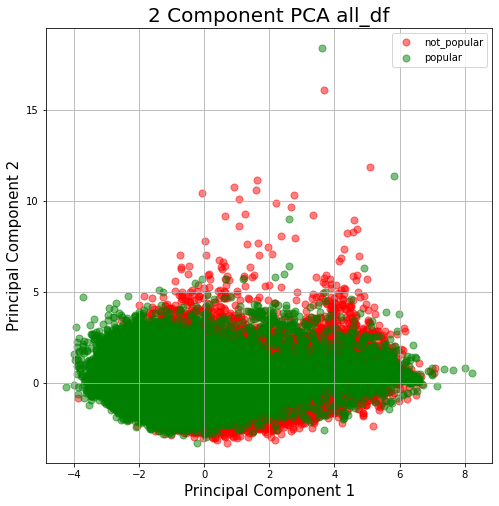

In [ ]:
pca_all_df = pca(all_df)
pca_scatter(pca_all_df, 'all_df')

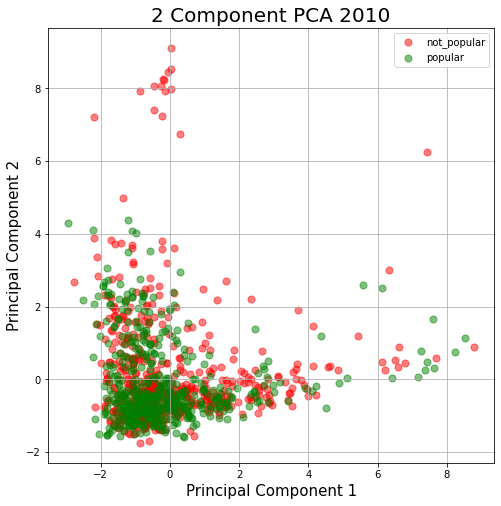

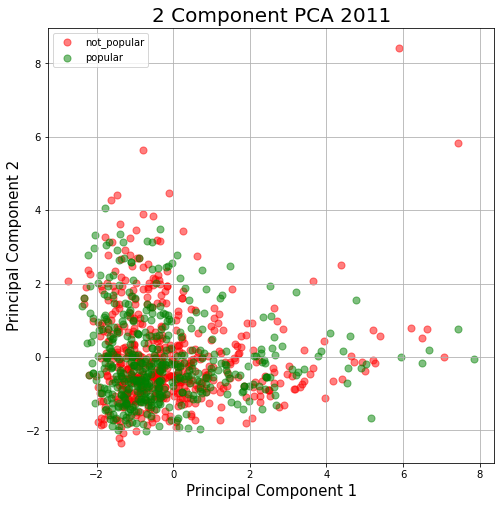

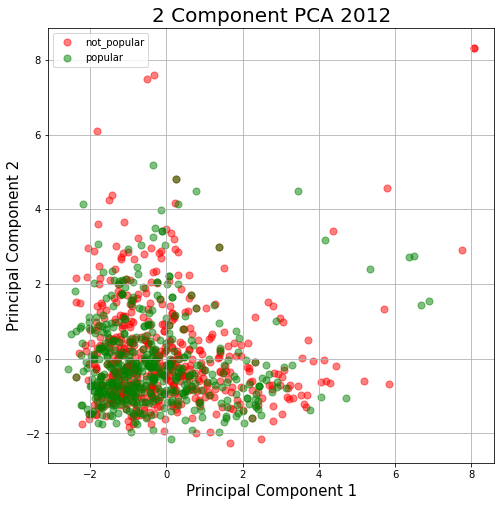

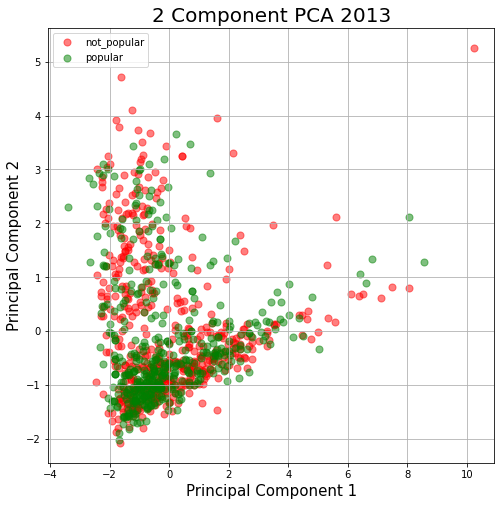

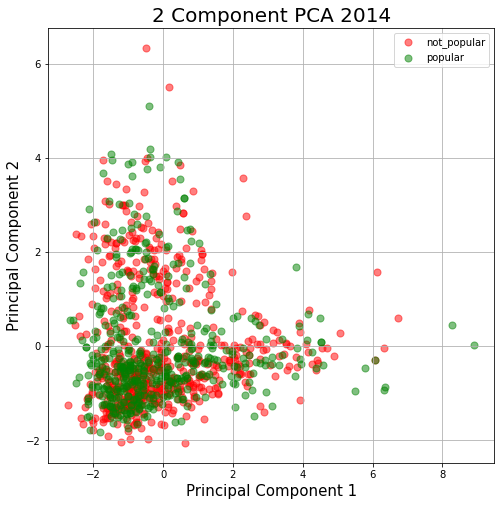

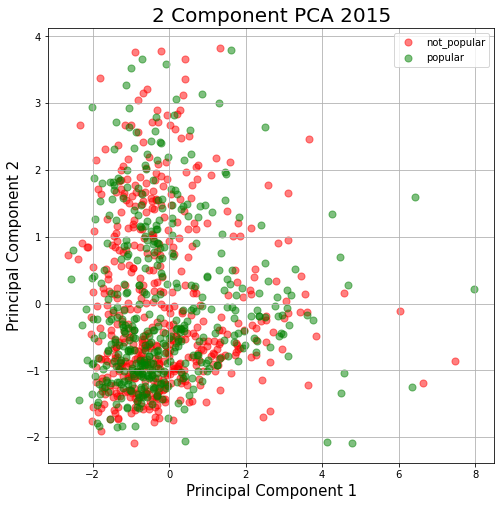

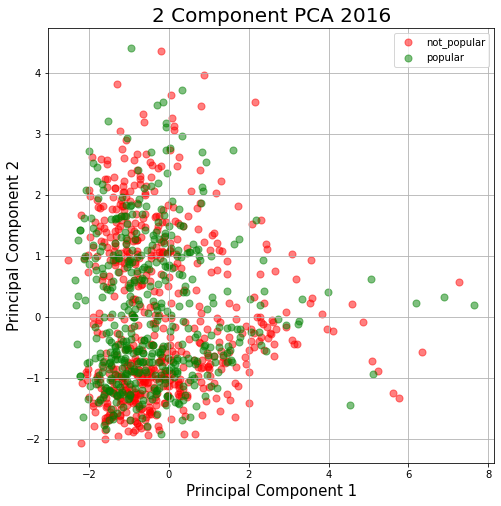

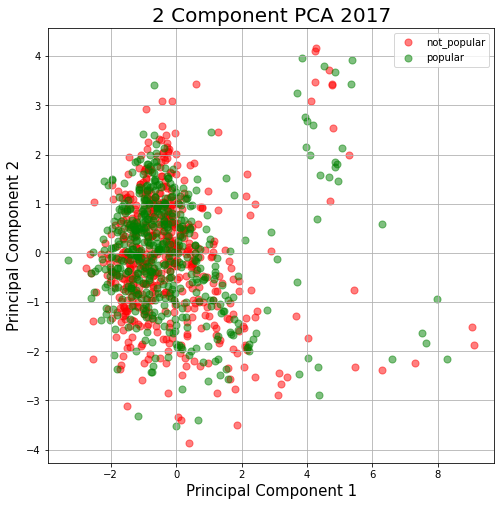

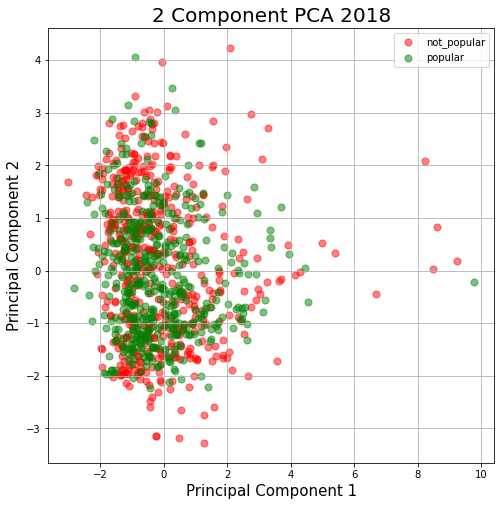

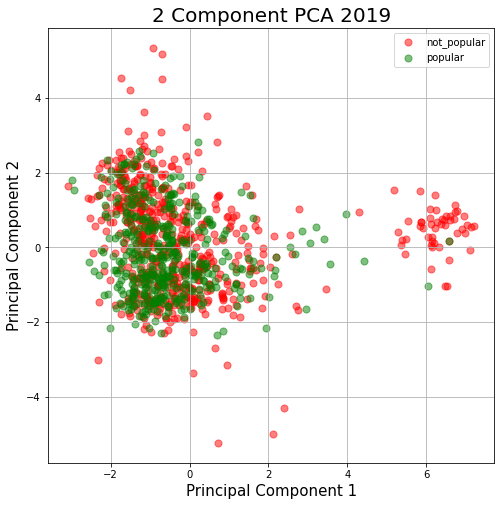

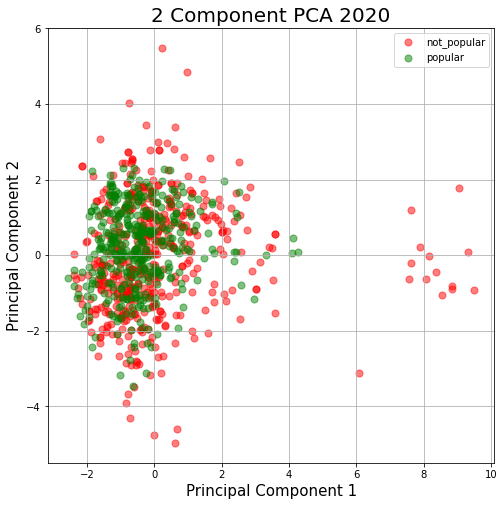

In [ ]:
#looking for patterns in a specific year
for i in range(2010,2021):
  df = year_df(all_df, i)
  pca_df = pca(df)
  pca_scatter(pca_df, i)

# Looking at histograms of popular vs. attributes and not popular vs. attributes

In [ ]:
#Retruns histogram of each attribute for bottom 10% of songs, 20-30%. 70-80%, and top 10% of songs
def histogram(df, att):

  df['cut'] = pd.qcut(df['popularity'], q=10, labels=['not_popular', '2', '3', '4', '5', '6', '7', '8', '9', 'popular'])
  #df['quartile'] = pd.qcut(df['popularity'], q=4, labels=['not_popular', '2nd_q', '3rd_q', 'popular'])
  fig, axes = plt.subplots(4, 1)
  c = ['r', 'g', 'b', 'y']
  q = ['not_popular', '3', '8', 'popular']
  #q = ['not_popular', '2nd_q', '3rd_q', 'popular']
  for i in range(len(q)):
    #df[df['quartile'] == q[i]][att].plot(kind = 'hist', ax = axes[i], title = f'{q[i].title()} ({att})', figsize = (8,8), color = c[i])
    df[df['cut'] == q[i]][att].plot(kind = 'hist', ax = axes[i], title = f'{q[i].title()} ({att})', figsize = (8,8), color = c[i])

  fig.tight_layout()

In [ ]:
col = ['acousticness', 'danceability', 'duration_ms', 'energy', 'explicit',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'popularity',
       'speechiness', 'tempo', 'valence']

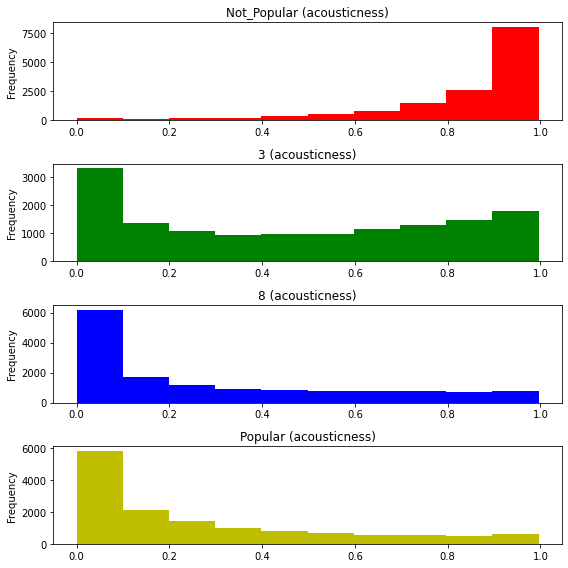

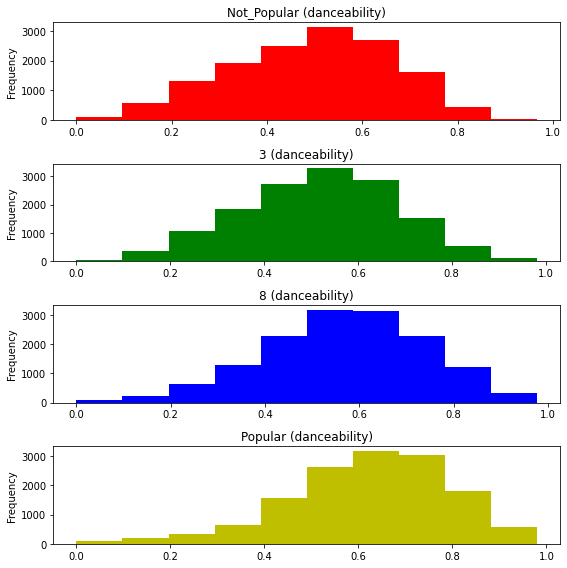

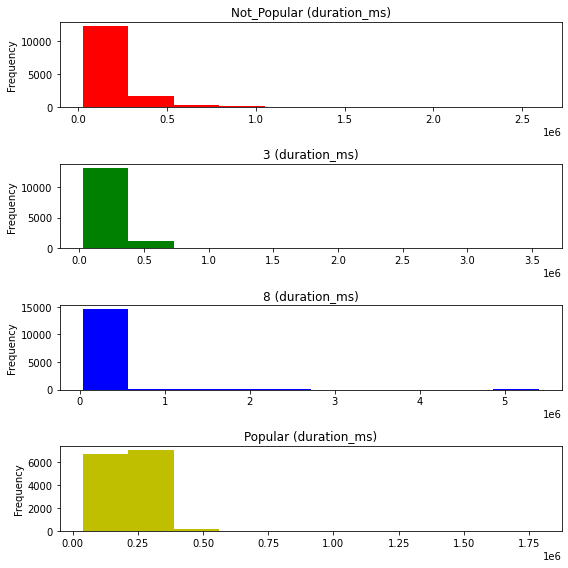

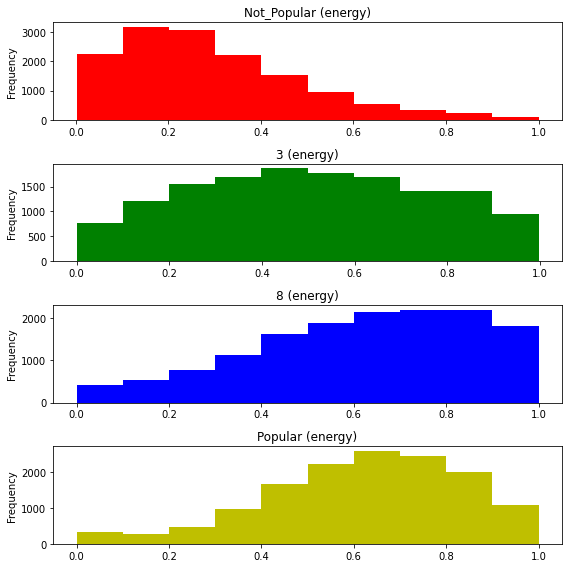

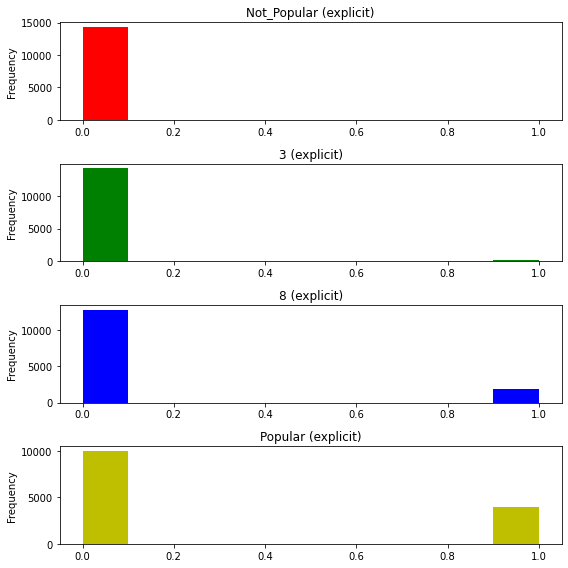

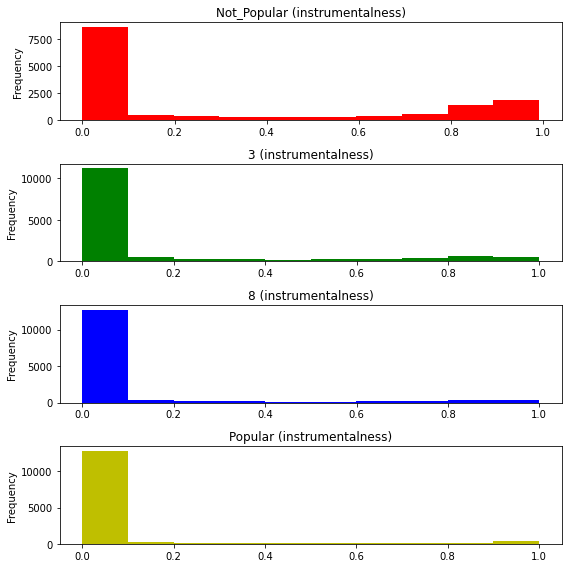

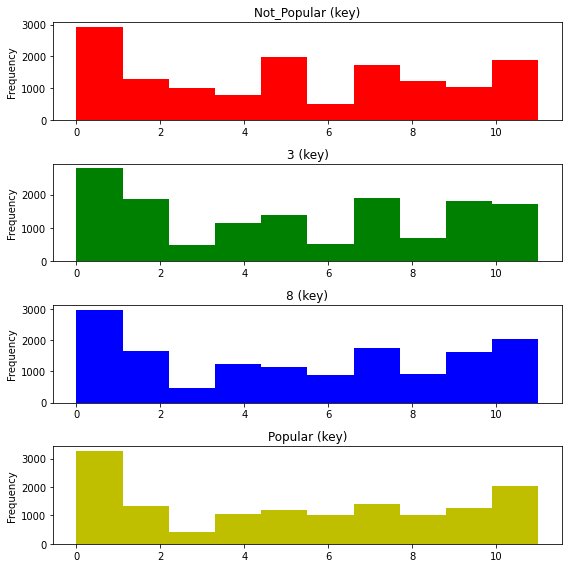

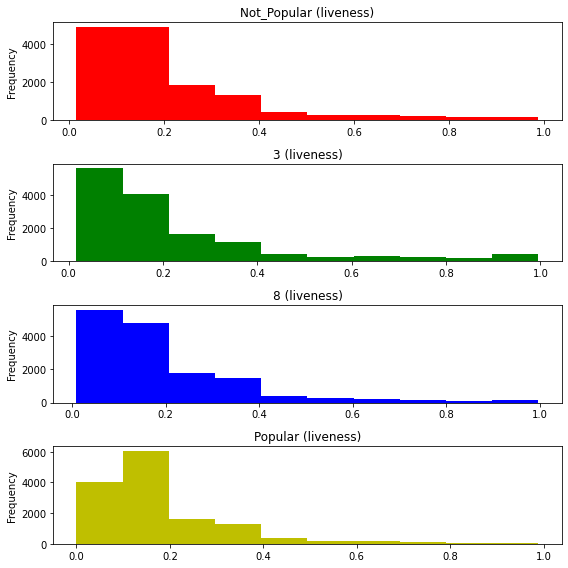

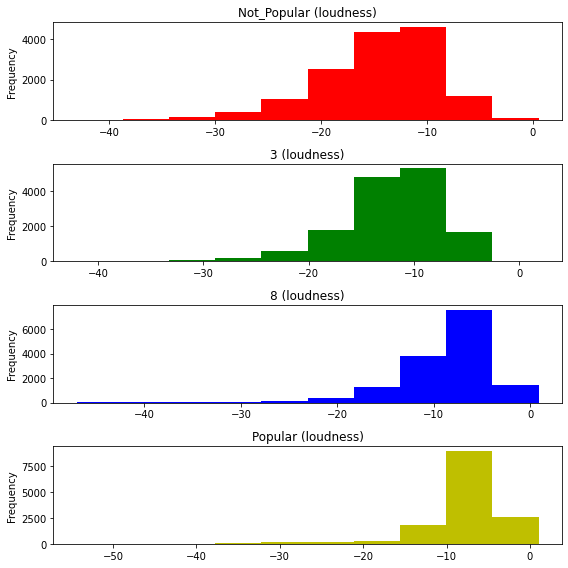

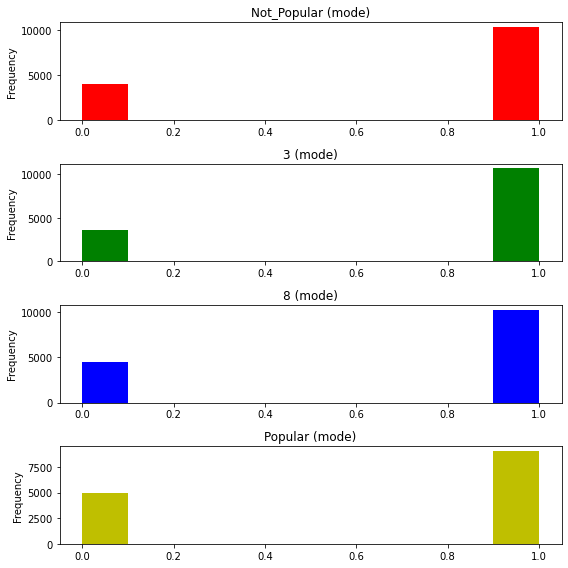

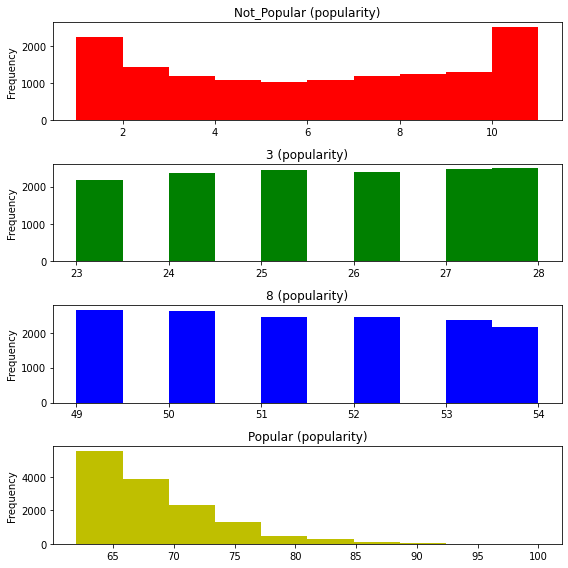

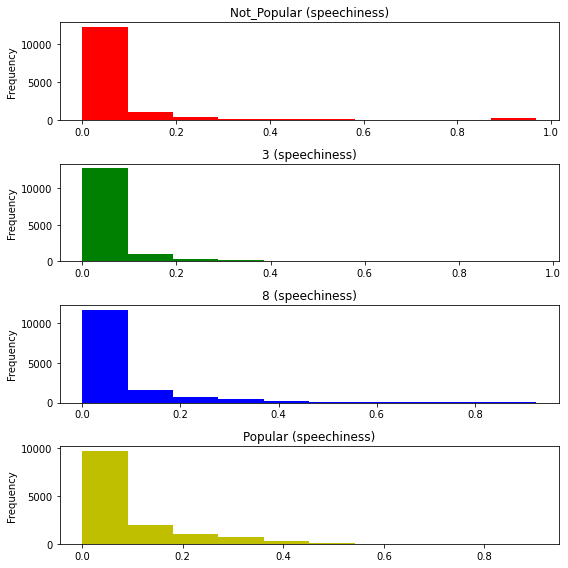

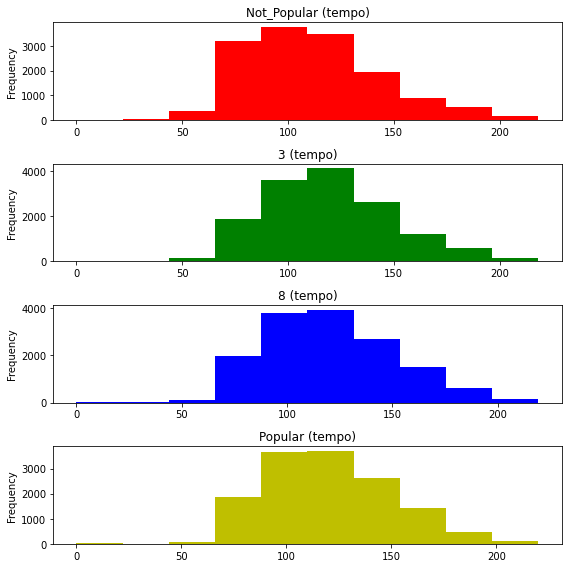

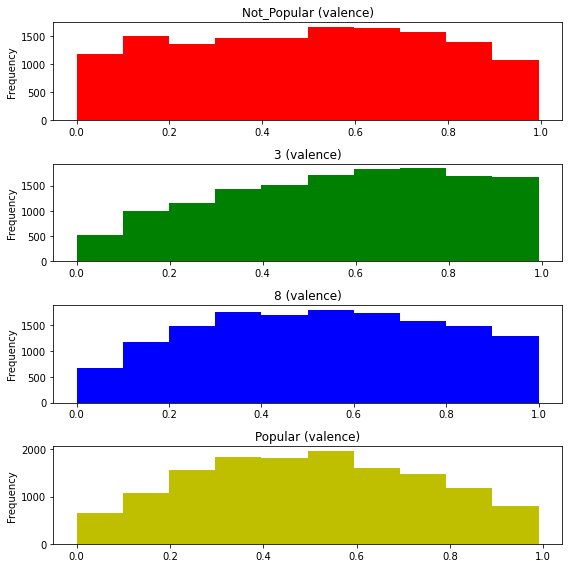

In [ ]:
for att in col:
  histogram(all_df, att)

#Attribute
In this section, I will look to see what the mean of each column looks like across each year (looking at the overall trend for each column over the years)

In [ ]:
def mean_line(df, att):
  years = df['year'].unique()
  years.sort()
  mean = []
  for y in years:
    y_df = year_df(df,y)
    mean.append(y_df[att].mean())

  plt.plot(years, mean)
  plt.title(att.title())
  plt.figure(figsize =(8,8))


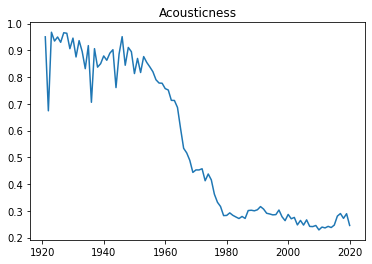

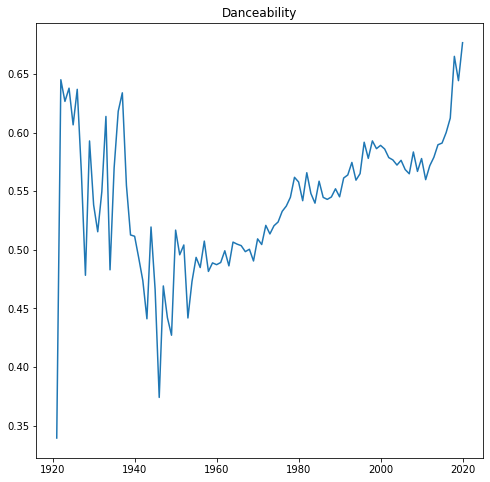

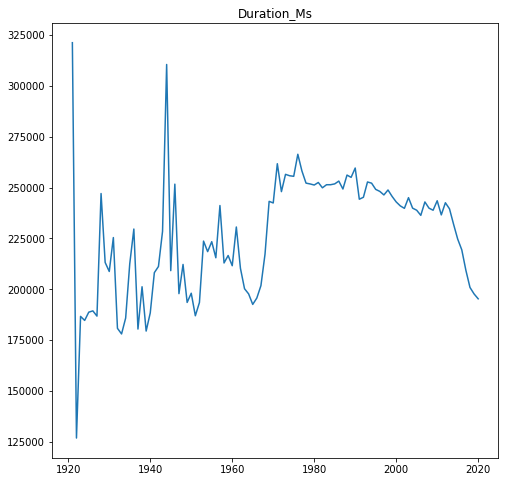

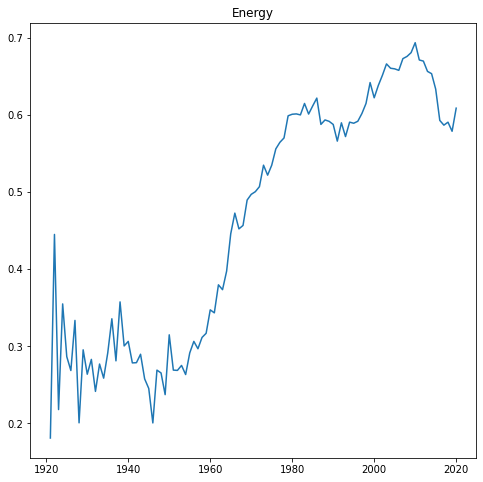

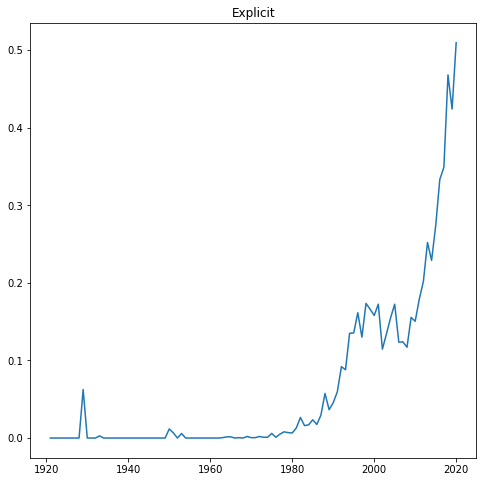

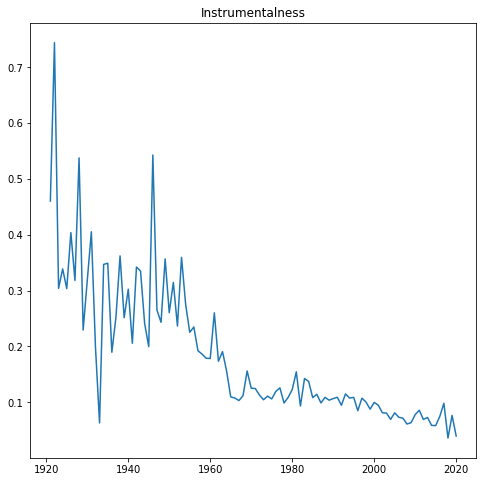

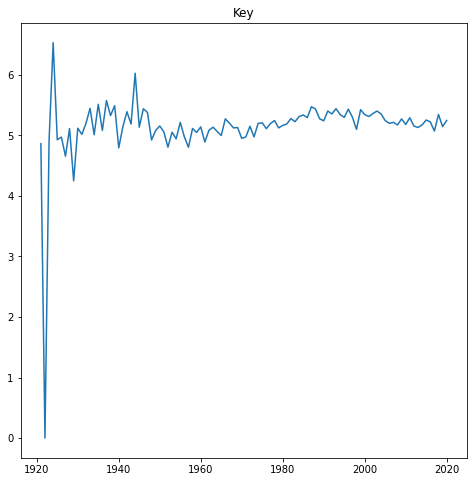

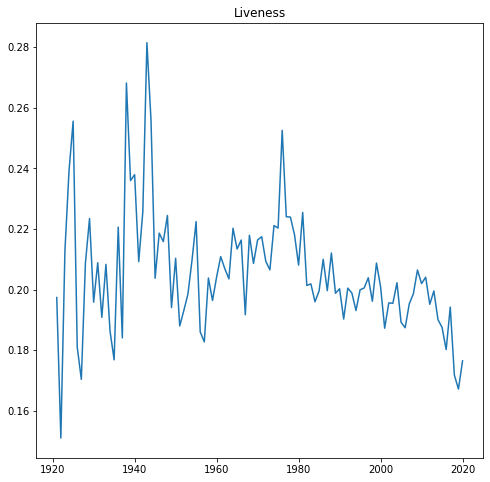

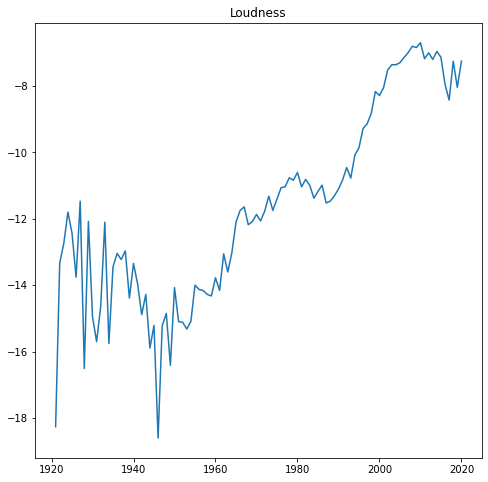

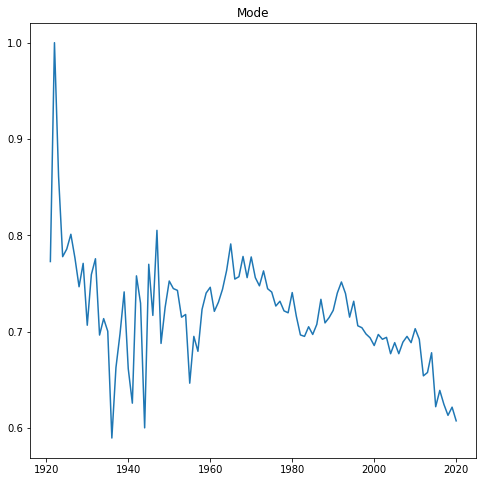

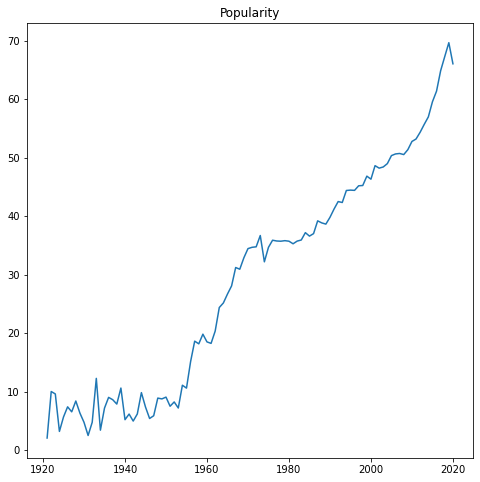

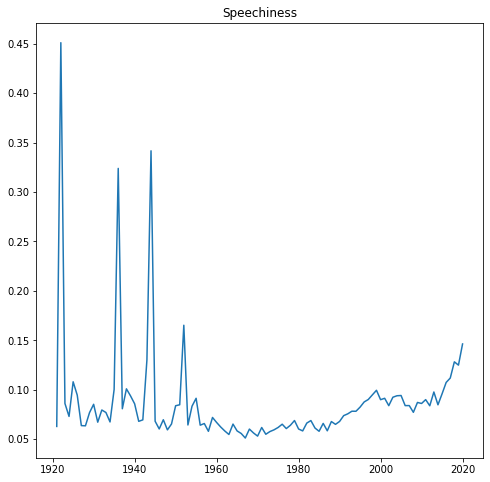

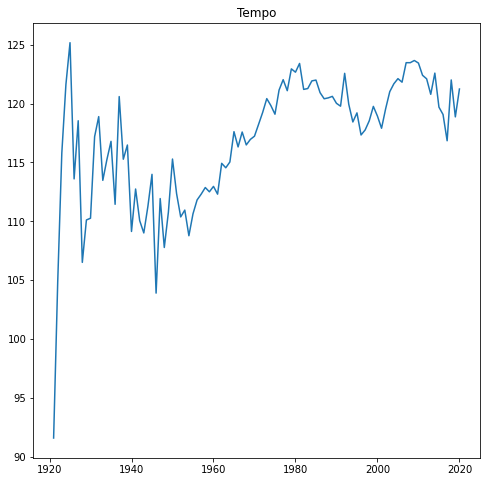

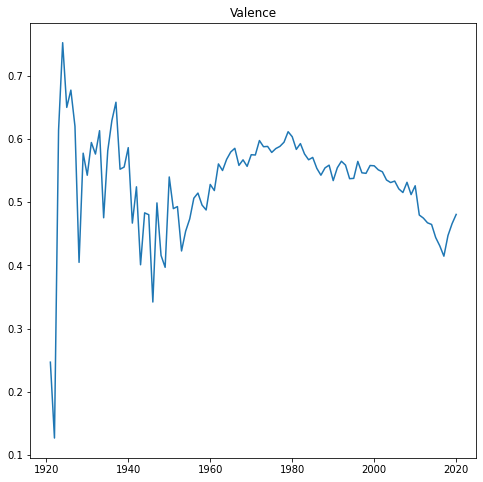

<Figure size 576x576 with 0 Axes>

In [ ]:
for att in col:
  mean_line(all_df, att)


##Same thing, but looking at the trend for each column by mean and popularity. (looking at top 10% of songs by popularity and bottom 10% of songs for that year by popularity)

In [ ]:
#many years before 1954 contain the majority of songs with 1 popularity, so qcut does not work for them
def mean_line_pop(df,att, begin_year = 1954):
  years = []
  mean_popular = []
  mean_not_popular = []
  for y in range(begin_year,2021):
    y_df = year_df(df,y)
    y_df['cut'] = pd.qcut(y_df['popularity'], q=10, labels=['not_popular', '2', '3', '4', '5', '6', '7', '8', '9', 'popular'])
    popular_df = y_df[y_df['cut'] == 'popular']
    not_popular_df = y_df[y_df['cut'] == 'not_popular']
    years.append(y)
    mean_popular.append(popular_df[att].mean())
    mean_not_popular.append(not_popular_df[att].mean())

  plt.plot(years, mean_popular, label = 'popular')
  plt.plot(years, mean_not_popular, label = 'not_popular')
  plt.xlabel('year')
  plt.ylabel(att)
  plt.title(f'{att.title()}')
  plt.legend()
  plt.figure(figsize =(8,8))


Streaming output truncated to the last 5000 lines.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

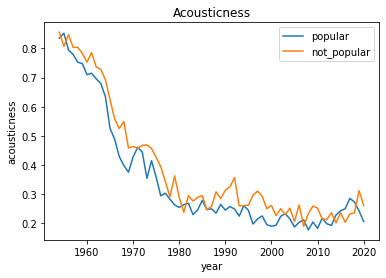

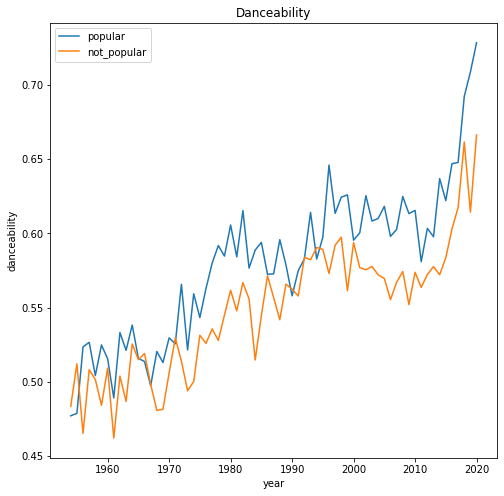

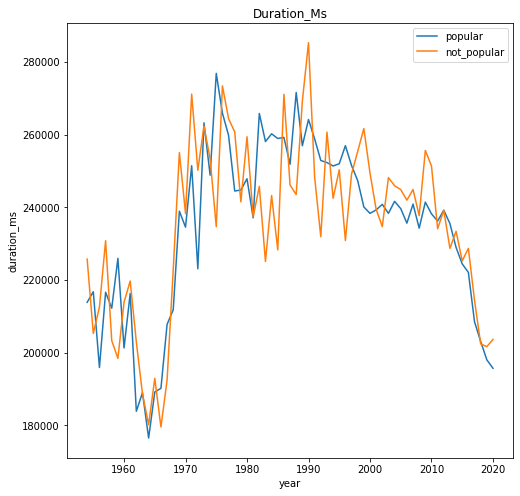

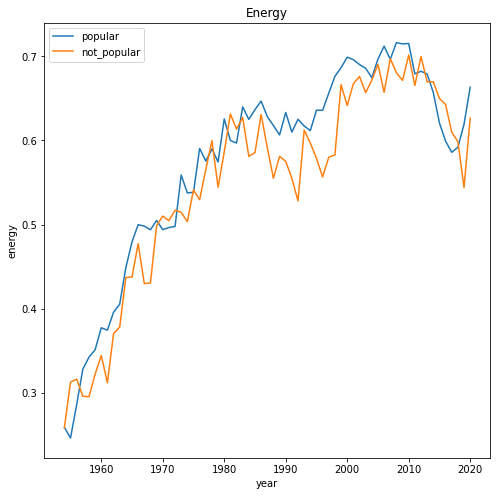

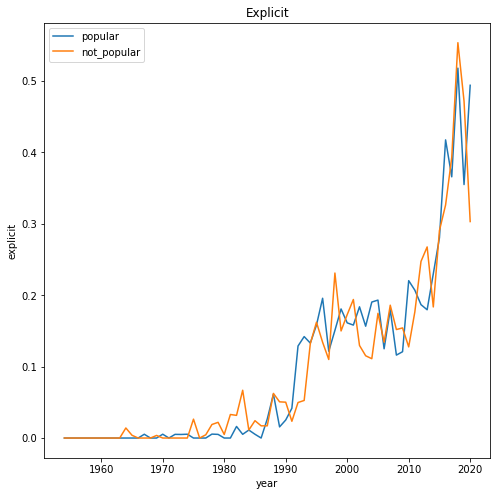

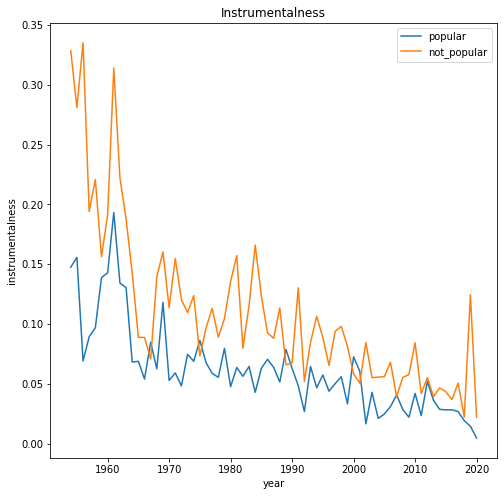

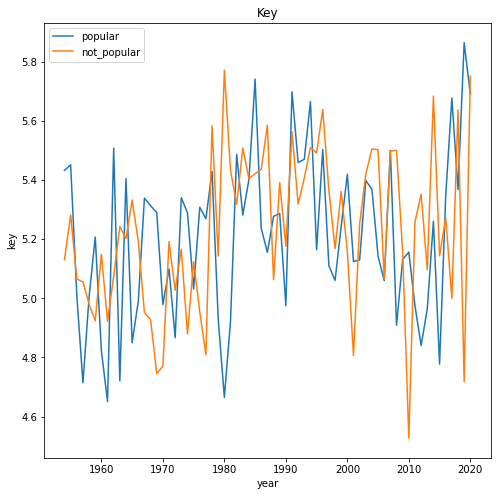

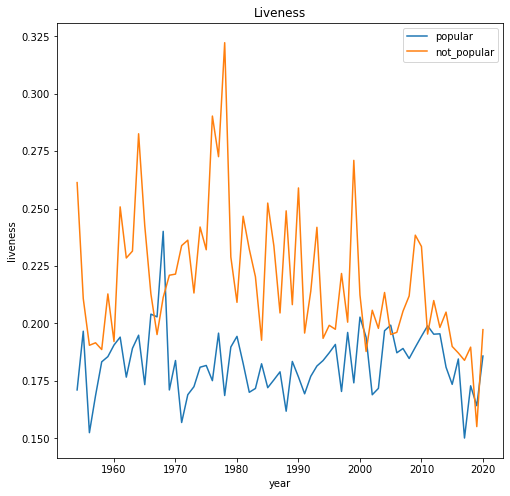

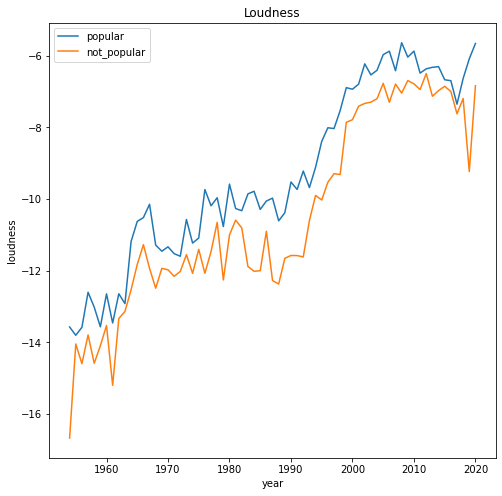

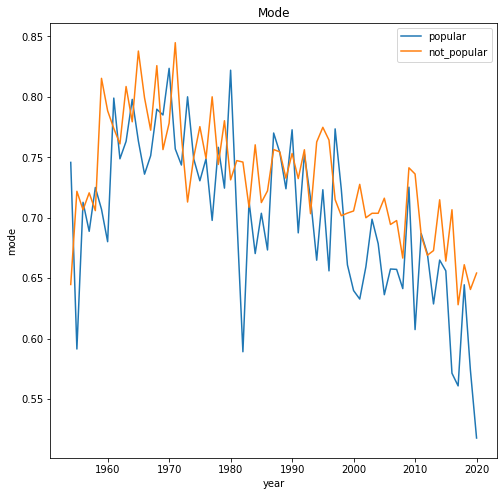

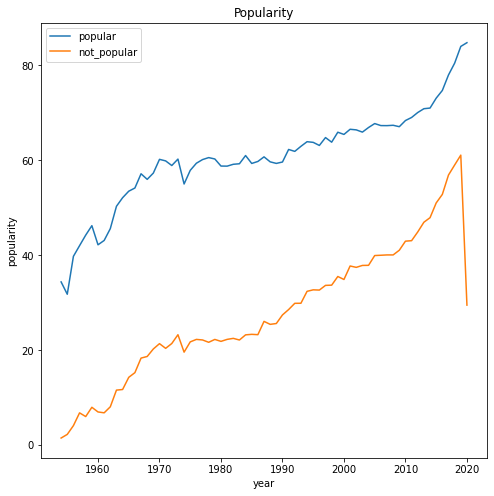

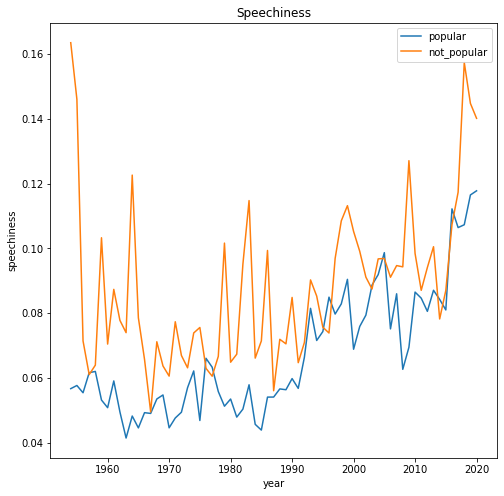

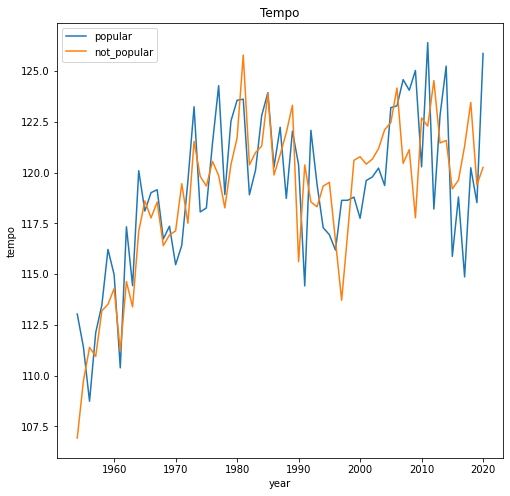

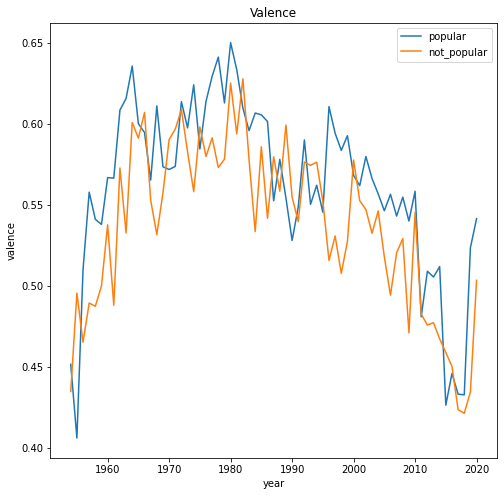

<Figure size 576x576 with 0 Axes>

In [ ]:
for att in col:
  mean_line_pop(all_df,att)


##Using the mean to create differentes histograms popularity vs (differents categories)

In [ ]:
def pop_vs_att(att):
  group = all_df.groupby('popularity')[att].mean()
  group = group.reset_index()
  group.columns = ['popularity', 'mean']
  group.plot.bar(x='popularity', y='mean', title = f'{att} vs. popularity', figsize=(15,8))

ValueError: ignored

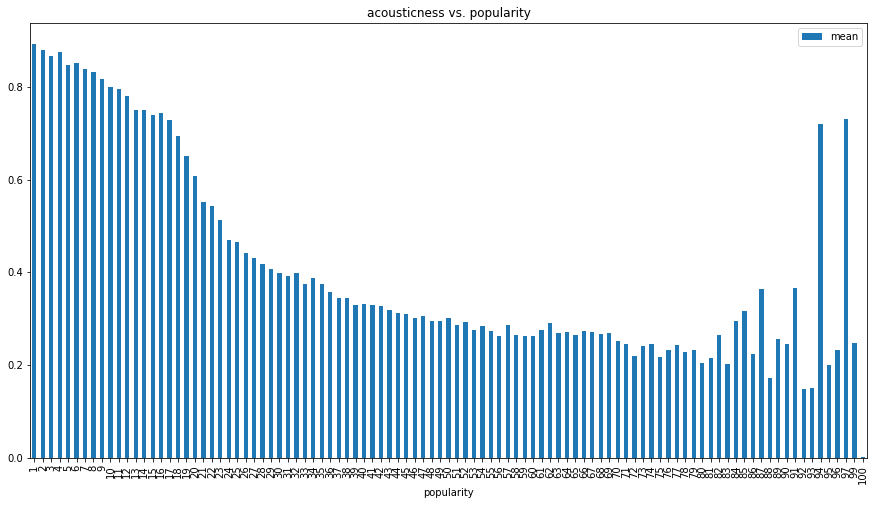

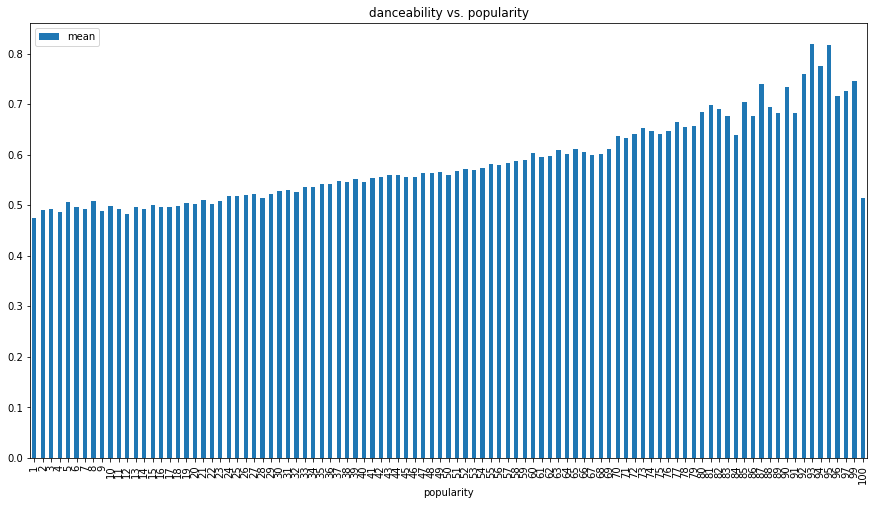

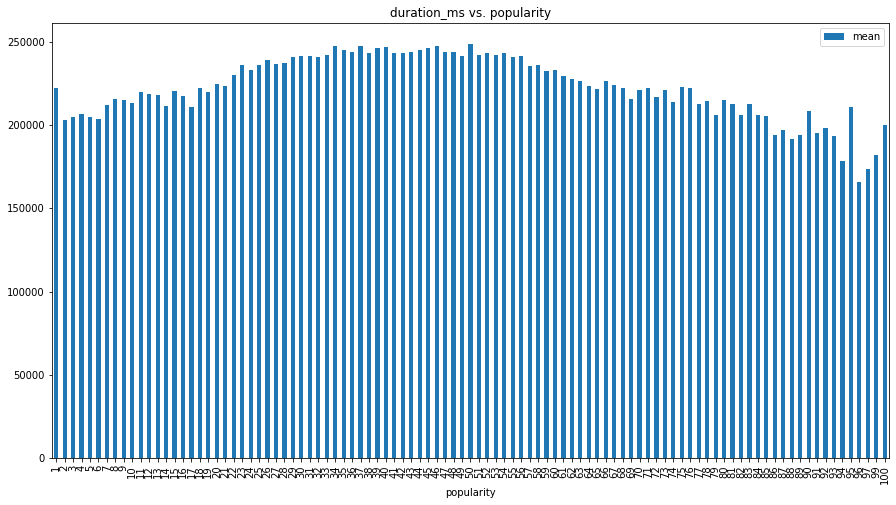

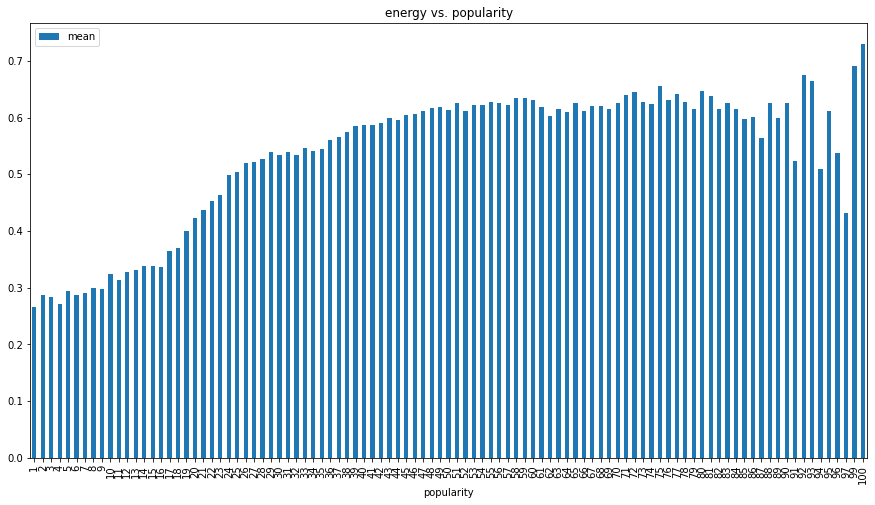

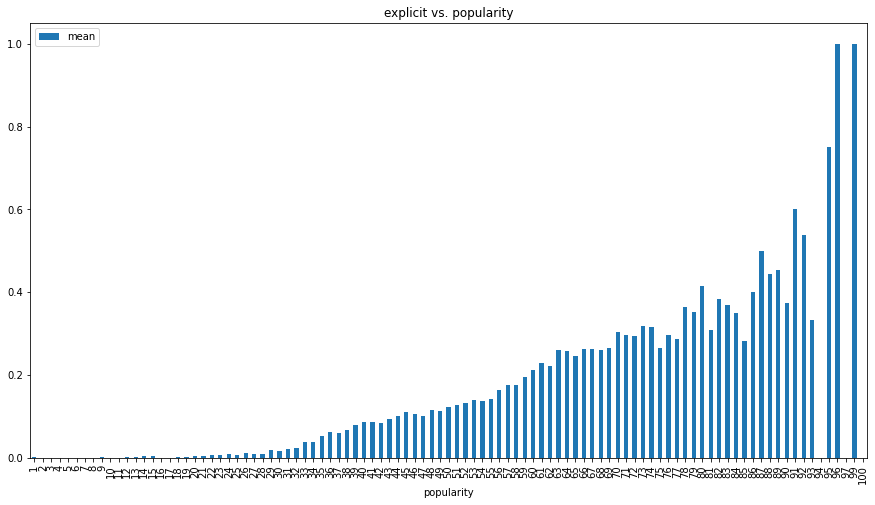

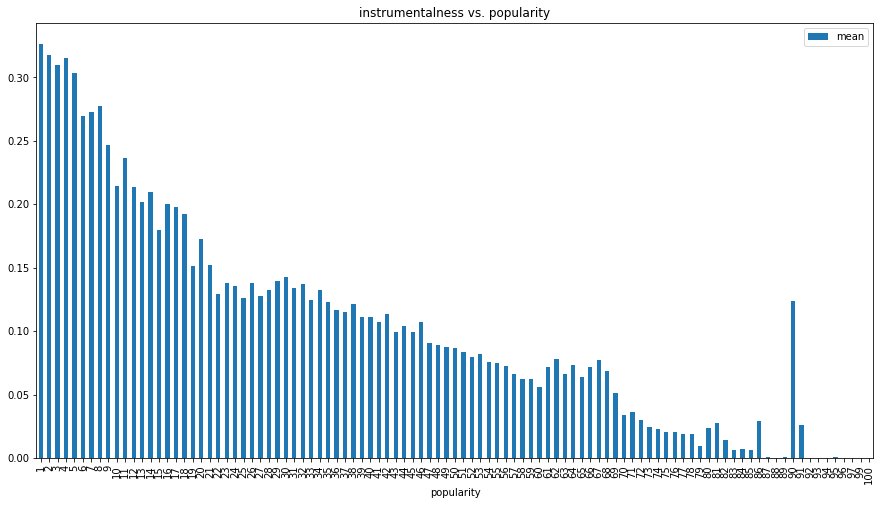

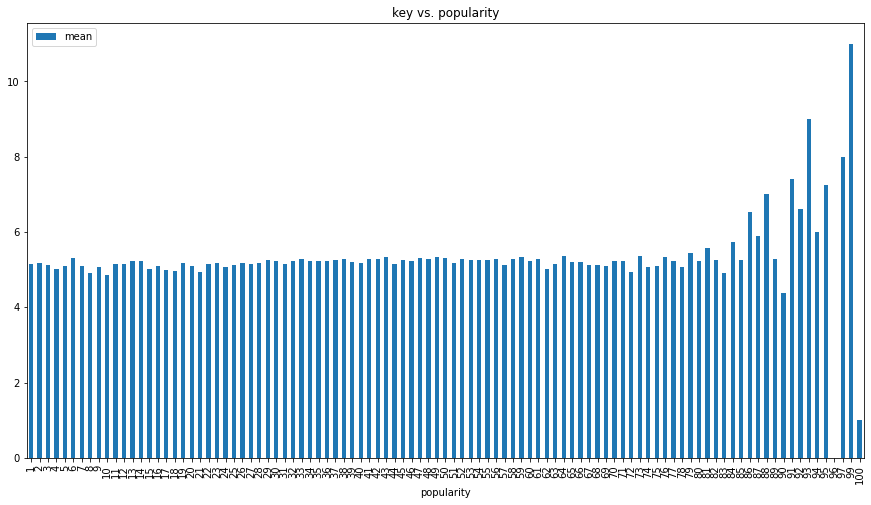

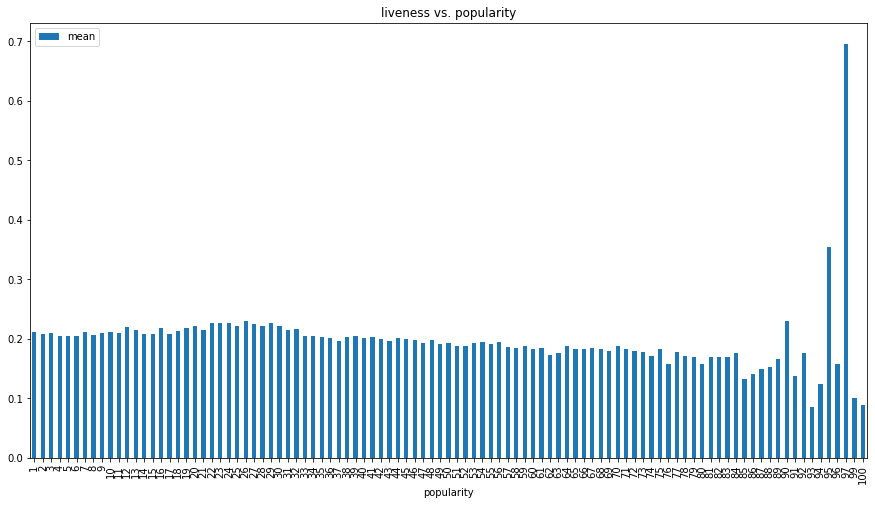

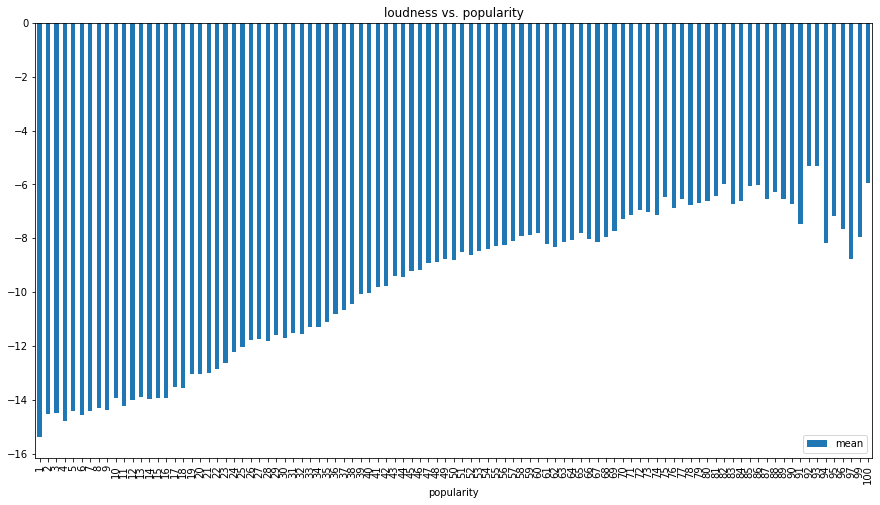

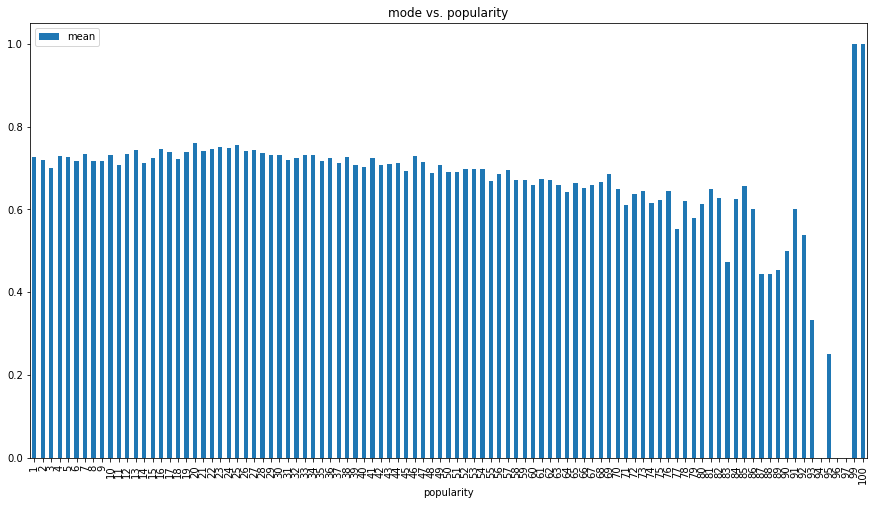

In [ ]:
for att in col:
  pop_vs_att(att)

##Graphs using quartiles

This is a boxplot graph is just the popular data. Illustrates the median, the max/min, the second quartile and third quartile for popularity. 

In [ ]:
ax= popular.boxplot(column=['popularity'], by='year', grid=False, rot=45, figsize=(18,15))
ax.set_title('Popular data vs Year')
ax.set_ylabel('Popularity')
ax.set_xlabel('Year')

This is a boxplot graph is just the second part of the data. Illustrates the median, the max/min, the second quartile and third quartile for popularity. 

In [ ]:
secnd_q= all_df[all_df['quartile']=='2nd_q']
ax= secnd_q.boxplot(column=['popularity'], by='year', grid=False, rot=45, figsize=(18,15))
ax.set_title('Second quartile data vs Year')
ax.set_ylabel('Popularity')
ax.set_xlabel('Year')

This is a boxplot graph is just the third portion of the data. Illustrates the median, the max/min, the second quartile and third quartile for popularity. 

In [ ]:
thirdnd_q= all_df[all_df['quartile']=='3rd_q']
ax= thirdnd_q.boxplot(column=['popularity'], by='year', grid=False, rot=45, figsize=(18,15))
ax.set_title('Second quartile data vs Year')
ax.set_ylabel('Popularity')
ax.set_xlabel('Year')

This is a boxplot graph is just the not popular data. Illustrates the median, the max/min, the second quartile and third quartile for popularity. 

In [ ]:
ax= not_popular.boxplot(column=['popularity'], by='year', grid=False, rot=45, figsize=(18,15))
ax.set_title('Not popular data vs Year')
ax.set_ylabel('Popularity')
ax.set_xlabel('Year')

#Attepmt to scale popularity by year. 
Popularity is calculated so that more recent songs have a higher popularity than older songs. My thinking is that the popularity for a song that was released in 2010 and was very popular in 2010 is not reflected because it is an older song. I want to trend the data so that the year it was released does not hurt or help it's popularity (especially for songs in 2000 and up).

In [ ]:
y_df = year_df(all_df, 1922)
x_df = year_df(all_df, 1930)
print(np.var(y_df['popularity']), np.var(x_df['popularity']))

0.0 33.57869590160982


In [ ]:
#checking to see how much each year contributes to each percentile
years = all_df['year'].unique()
years.sort()
for n, group in all_df.groupby('cut'):
  for y in years:
    percent = 100*(group[group['year'] == y].shape[0]/group.shape[0])
    print(f'{y} has {percent:.2f}% of all {n}')

In [ ]:
#normalizing the popularity
def scale_pop(df):
  std_all = np.var(df['popularity'])**.5
  mean_all = np.mean(df['popularity'])

  norm_df = pd.DataFrame(columns = ['acousticness', 'danceability', 'duration_ms', 'energy', 'explicit',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'popularity',
       'speechiness', 'tempo', 'valence', 'year', 'cut'] )

  for y in years:
    y_df = df[df['year'] == y]
    pop = y_df['popularity'].tolist()
    new_list = [(x - np.mean(pop))/(np.var(pop))**.5 for x in pop]
    norm_list = [x*std_all+mean_all for x in new_list]
    y_df['popularity'] = norm_list
    norm_df = pd.concat([norm_df,y_df], axis=0)
  
  return norm_df

In [ ]:
norm_df = scale_pop(all_df)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

In [ ]:
norm_df.head()

acousticness  danceability duration_ms  ...  valence  year  cut
78068         0.732         0.819      180533  ...   0.9630  1921    1
78069         0.982         0.279      831667  ...   0.0594  1921    1
78070         0.941         0.241      196307  ...   0.2120  1921    1
78071         0.957         0.418      166693  ...   0.2530  1921    1
78072         0.996         0.518      159507  ...   0.4060  1921    1

[5 rows x 16 columns]

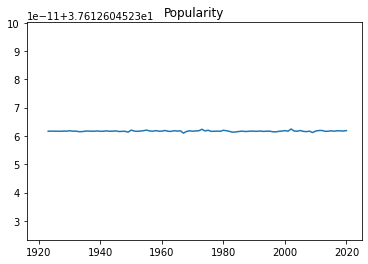

<Figure size 576x576 with 0 Axes>

In [ ]:
#The mean for all the years is now the same, so year is not a factor
#The problem with this is that a song from 1920 is just as popular as a song from 2020
mean_line(norm_df,'popularity')

#Looking at music from 2000-2020
Since we are presenting to record executives, I believe they will be more interested in the more recent trends

In [ ]:
recent_df = all_df[all_df['year']>1999]

In [ ]:
for att in col:
  mean_line_pop(recent_df,att,2000)

In [ ]:
recent_df['cut'] = pd.qcut(recent_df['popularity'], q=10, labels=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
recent_df.head()

acousticness  danceability  duration_ms  ...  valence  year  cut
6054       0.97200         0.567       313293  ...   0.0396  2000    3
6055       0.32100         0.821       360240  ...   0.8030  2000    4
6056       0.00659         0.706       202507  ...   0.4790  2000    2
6057       0.00390         0.368       173360  ...   0.5480  2000    5
6058       0.12200         0.501       344200  ...   0.1130  2000    5

[5 rows x 16 columns]

In [ ]:
norm_recent_df = scale_pop(recent_df)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [ ]:
norm_recent_df['cut'] = pd.qcut(norm_recent_df['popularity'], q=10, labels=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])

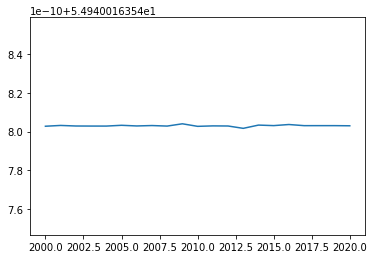

In [ ]:
x = []
y = []

for year,group in norm_recent_df.groupby('year'):
  x.append(year)
  y.append(group['popularity'].mean())
plt.plot(x,y)

#LinearRegression

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
def train_test_valid(df):
  train_df, test_df = train_test_split(df, test_size=0.3, random_state = 42)
  train_df, valid_df = train_test_split(train_df, test_size=int(0.1*df.shape[0]), random_state = 42)

  return train_df, test_df, valid_df

In [ ]:
train_df, test_df, valid_df = train_test_valid(all_df)

In [ ]:
train_rec_df, test_rec_df, valid_rec_df = train_test_valid(recent_df)

NameError: ignored

In [ ]:
train_nrec_df, test_nrec_df, valid_nrec_df = train_test_valid(norm_recent_df)

NameError: ignored

In [ ]:
def lr_fit(df, train_df, test_df, valid_df):

  lr = LinearRegression()

  #X_train = train_df[['duration_ms', 'key', 'loudness', 'mode', 'tempo', 'year']]
  X_train = train_df[['danceability', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'year']]
  y_train = train_df['popularity']

  #X_valid = valid_df[['duration_ms', 'key', 'loudness', 'mode', 'tempo', 'year']]
  X_valid = valid_df[['danceability', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'year']]
  y_valid = valid_df['popularity']

  #X_test = test_df[['duration_ms', 'key', 'loudness', 'mode', 'tempo', 'year']]
  X_test = test_df[['danceability', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'year']]
  y_test = test_df['popularity']

  lr.fit(X_train, y_train)

  return lr, X_train, y_train, X_valid, y_valid, X_test, y_test

In [ ]:
def lr_scatterplot(lr, X_test, y_test):
    fig = plt.figure(figsize=(12, 10))
    
    test_pred = lr.predict(X_test)
    plt.scatter(y_test, test_pred)

    plt.xlabel('Actual popularity')
    plt.ylabel('Predicted popularity')
    plt.title(f'Actual vs predicted using linear regression: R^2 = {np.corrcoef(y_test, test_pred)[0,1]**2:.3f}');

#KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
def knn_model(df, n, train_df, test_df, valid_df):
  cols_to_use = ['danceability', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'year']

  X_train = train_df[cols_to_use]
  y_train = train_df['cut']

  X_valid = valid_df[cols_to_use]
  y_valid = valid_df['cut']

  X_test = test_df[cols_to_use]
  y_test = test_df['cut']

  knn = KNeighborsClassifier(n_neighbors=n)
  knn.fit(X_train, y_train)

  return knn, X_train, y_train, X_valid, y_valid, X_test, y_test
    

In [ ]:
def knn_reg_model(df, n, train_df, test_df, valid_df):
  cols_to_use = ['danceability', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'year']

  X_train = train_df[cols_to_use]
  y_train = train_df['popularity']

  X_valid = valid_df[cols_to_use]
  y_valid = valid_df['popularity']

  X_test = test_df[cols_to_use]
  y_test = test_df['popularity']

  knn = KNeighborsRegressor(n_neighbors=n)
  knn.fit(X_train, y_train)

  return knn, X_train, y_train, X_valid, y_valid, X_test, y_test

In [ ]:
def knn_accuracy(df, start, n, train_df, test_df):
  
  acc_list = []
  cols_to_use = ['danceability', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'year']

  max_neighbors = n

  X_train = train_df[cols_to_use]
  y_train = train_df['cut']

  X_valid = valid_df[cols_to_use]
  y_valid = valid_df['cut']


  for N in range(start, max_neighbors+1):
    knn = KNeighborsClassifier(n_neighbors=N)
    knn.fit(X_train, y_train)

    acc = knn.score(X_valid, y_valid)
    acc_list.append(100*acc)
    

  plt.figure(figsize=(12, 8))
  plt.plot(range(start, max_neighbors+1), acc_list)
  plt.xticks(range(start, max_neighbors+1))
  plt.xlabel('Neighbors (N)')
  plt.ylabel('Accuracy (%)')
  plt.title('Validation accuracy');

In [ ]:
def knn_reg_accuracy(df, start, n, train_df, test_df):
  
  acc_list = []
  cols_to_use = ['danceability', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'year']

  max_neighbors = n

  X_train = train_df[cols_to_use]
  y_train = train_df['popularity']

  X_valid = valid_df[cols_to_use]
  y_valid = valid_df['popularity']


  for N in range(start, max_neighbors+1):
    knn = KNeighborsRegressor(n_neighbors=N)
    knn.fit(X_train, y_train)

    acc = knn.score(X_valid, y_valid)
    acc_list.append(acc)
    

  plt.figure(figsize=(12, 8))
  plt.plot(range(start, max_neighbors+1), acc_list)
  plt.xticks(range(start, max_neighbors+1))
  plt.xlabel('Neighbors (N)')
  plt.ylabel('Score (R^2)')
  plt.title('Validation accuracy');

In [ ]:
# returns [maximum accuracy in range, the number of neighbors for that max accuracy]
def knn_max_acc(df, start, n, train_df, valid_df):

  acc_list = []
  cols_to_use = ['danceability', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'year']

  max_neighbors = n

  X_train = train_df[cols_to_use]
  y_train = train_df['cut']

  X_valid = valid_df[cols_to_use]
  y_valid = valid_df['cut']


  for N in range(start, max_neighbors+1):
    knn = KNeighborsClassifier(n_neighbors=N)
    knn.fit(X_train, y_train)

    acc = knn.score(X_valid, y_valid)
    acc_list.append([acc,N])
  
  return max(acc_list)

In [ ]:
#Returns percent the model predicted correctly
# ex. correct predicted 10s / all actual 10s
def check_actual(knn, X, y, o):

  knn.predict(X)

  df = y.to_frame(name = 'actual')
  df['predicted'] = knn.predict(X)

  cut_check_df = df[df['actual'] == o]
  return (cut_check_df['actual'] == cut_check_df['predicted']).sum()/cut_check_df.shape[0]

In [ ]:
# correct predicted 10s / all predicted 10s
def check_pred(knn, X, y, o):

  knn.predict(X)

  df = y.to_frame(name = 'actual')
  df['predicted'] = knn.predict(X)

  cut_check_df = df[df['predicted'] == o]
  return (cut_check_df['actual'] == cut_check_df['predicted']).sum()/cut_check_df.shape[0]

In [ ]:
def knn_scatterplot(knn, X_test, y_test, a = .5):
  fig = plt.figure(figsize=(12, 10))

  test_pred = knn.predict(X_test)
  plt.scatter(y_test, test_pred, alpha = a)

  plt.xlabel('Actual popularity')
  plt.ylabel('Predicted popularity')
  plt.title(f'Actual vs predicted using linear regression: R^2 = {np.corrcoef(y_test, test_pred)[0,1]**2:.3f}');

#Creating models using:
  - all_df
  - recent_df
  - recent_norm_df




##LinearRegression

In [ ]:
all_lr, X_train, y_train, X_valid, y_valid, X_test, y_test = lr_fit(all_df,train_df,test_df,valid_df)

In [ ]:
recent_pop_lr, X_rec_train, y_rec_train, X_rec_valid, y_rec_valid, X_rec_test, y_rec_test = lr_fit(recent_df,train_rec_df,test_rec_df,valid_rec_df)

In [ ]:
recent_norm_lr, X_rec_norm_train, y_rec_norm_train, X_rec_norm_valid, y_rec_norm_valid, X_rec_norm_test, y_rec_norm_test = lr_fit(norm_recent_df,train_nrec_df,test_nrec_df,valid_nrec_df)

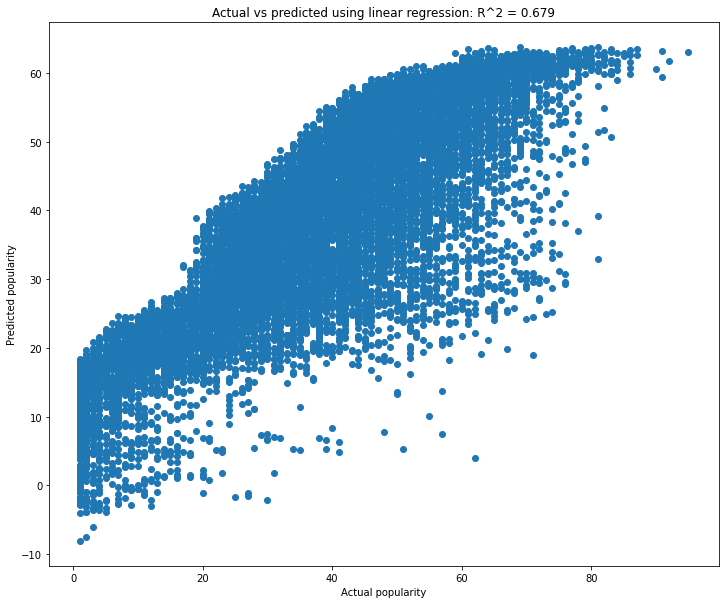

In [ ]:
lr_scatterplot(all_lr, X_valid, y_valid)

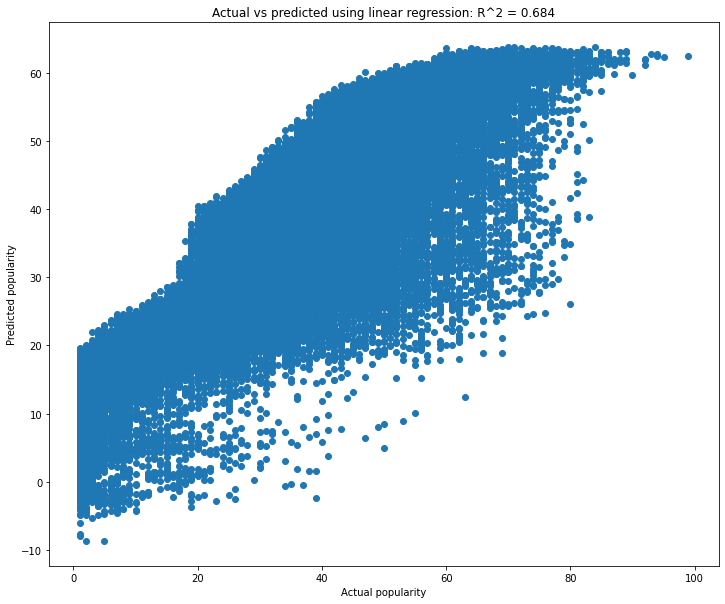

In [ ]:
lr_scatterplot(all_lr, X_test, y_test)

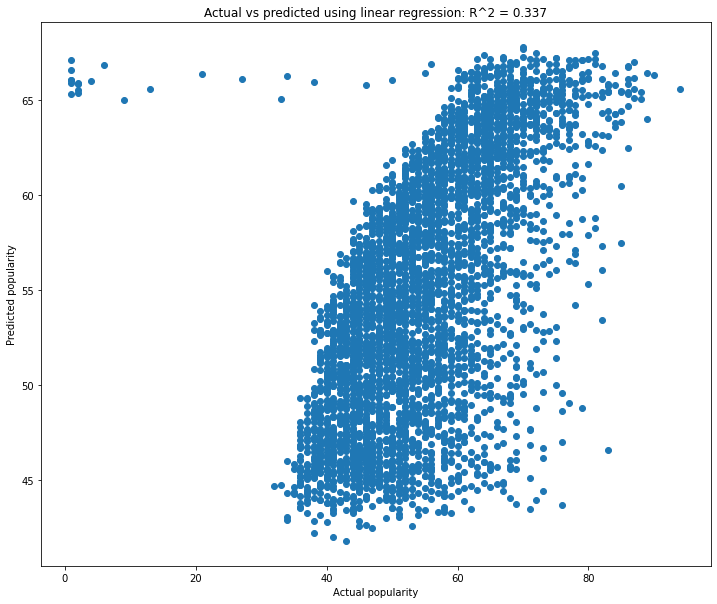

In [ ]:
lr_scatterplot(recent_pop_lr,X_rec_valid,y_rec_valid)

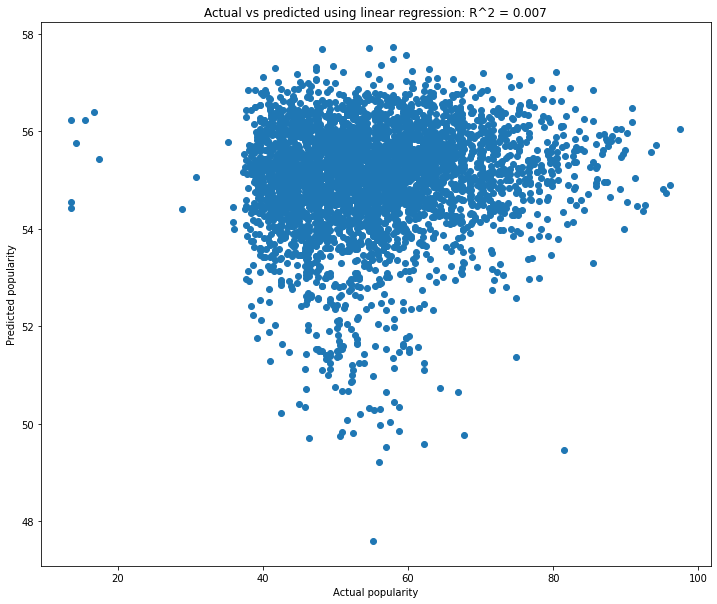

In [ ]:
lr_scatterplot(recent_norm_lr,X_rec_norm_valid,y_rec_norm_valid)

##KNNClassifier

In [ ]:
all_knn, Xknn_train, yknn_train, Xknn_valid, yknn_valid, Xknn_test, yknn_test = knn_model(all_df,79,train_df,test_df,valid_df)

In [ ]:
recent_knn, X_recent_train, y_recent_train, X_recent_valid, y_recent_valid, X_recent_test, y_recent_test = knn_model(recent_df,62,train_rec_df,test_rec_df,valid_rec_df)

In [ ]:
#[35.62665383690161, 28]
#[36.252104883329324, 79] winner winner
#[35.554486408467646, 155]
#[35.819100312725524, 247] also check
knn_max_acc(all_df, 180, 250, train_df,valid_df)

[0.36185508880744294, 239]

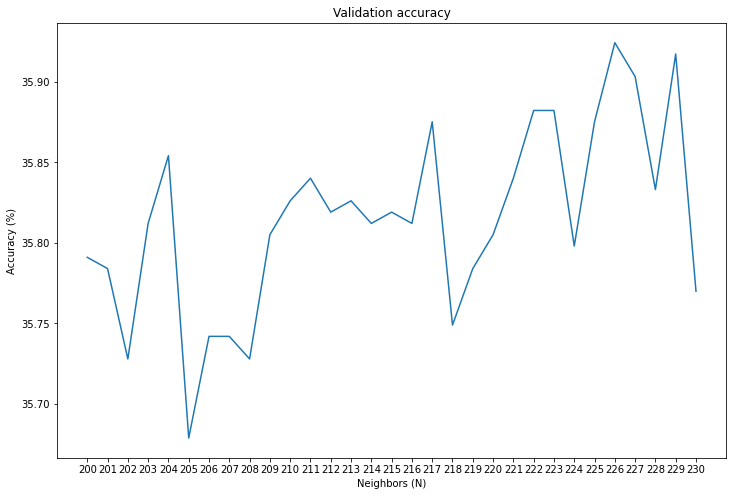

In [ ]:
knn_accuracy(all_df, 200, 230,train_df,valid_df)

In [ ]:
#0.4965197215777262 neighbors = 79
check_actual(all_knn, Xknn_valid, yknn_valid, '10')

0.4965197215777262

In [ ]:
#0.7505938242280285 neighbors = 79
check_actual(all_knn, Xknn_valid, yknn_valid, '1')

0.7505938242280285

- Predicted 49.65% of actual 10s correctly
- Predicted 75.05% of actual 1s correctly
- (10 is top 10% of popular songs, 1 is bottom 10% of popular songs)

In [ ]:
#0.7016393442622951 neighbors = 79
check_pred(all_knn, Xknn_valid, yknn_valid, '10')

0.7016393442622951

In [ ]:
#0.43912175648702595 neighbors = 79
check_pred(all_knn, Xknn_valid, yknn_valid, '1')

0.6991150442477876

- Out of all the predicted 10s, 70.16% were actually 10s
- Out of all the predicted 1s, 69.91% were actually 1s

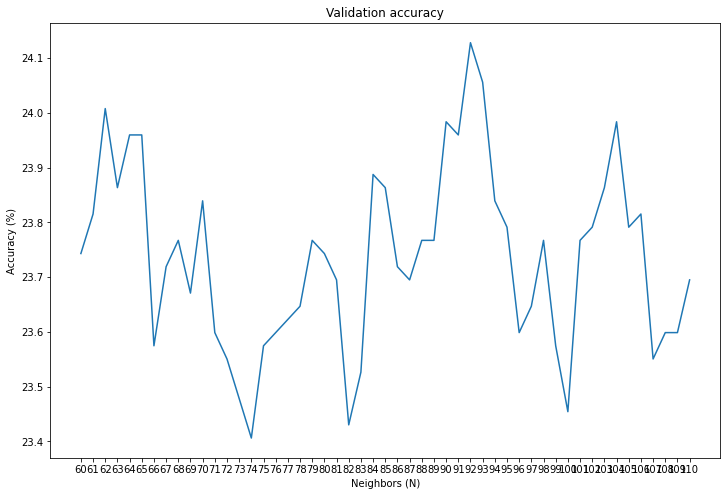

In [ ]:
knn_accuracy(recent_df, 60, 110,train_rec_df,valid_rec_df)

In [ ]:
#0.5597964376590331 neighbors = 92
check_actual(recent_knn, X_recent_valid, y_recent_valid, '10')

NameError: ignored

In [ ]:
#0.656441717791411 neighbors = 92
check_actual(recent_knn, X_recent_valid, y_recent_valid, '1')

0.6666666666666666

- Predicted 53.94% of actual 10s correctly
- Predicted 66.67% of actual 1s correctly
- (10 is top 10% of popular songs, 1 is bottom 10% of popular songs)

In [ ]:
#0.43912175648702595 neighbors = 92
check_pred(recent_knn, X_recent_valid, y_recent_valid, '10')

0.4344262295081967

In [ ]:
#0.2706576728499157 neighbors = 92
check_pred(recent_knn, X_recent_valid, y_recent_valid, '1')

0.2748735244519393

- Out of all the predicted 10s, 43.44% were actually 10s
- Out of all the predicted 1s, 27.48% were actually 1s

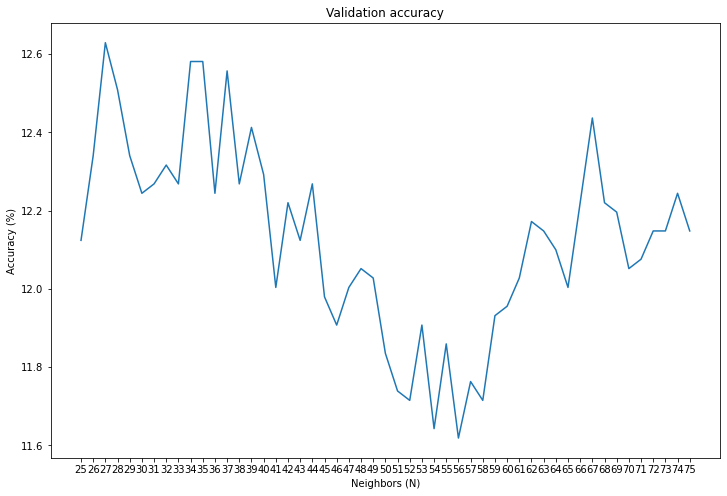

In [ ]:
#Not even gonna look becuase it is so low
knn_accuracy(norm_recent_df, 25, 75)

##KNNRegression

In [ ]:
def powerset(s):
  x = len(s)
  ps = []
  for i in range(1 << x):
       ps.append([s[j] for j in range(x) if (i & (1 << j))])
  
  return ps[1:]

In [ ]:
#This is what came out after 3 hours (did not finish) ['acousticness','danceability','energy','explicit','liveness','loudness','speechiness']
#I added 'year' bc I know that is highly correlated with popularity
#The highest correlation for this was lower that the highest correlation we were using, so I kept our features
all_cols = ['acousticness', 'danceability', 'duration_ms', 'energy', 'explicit',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'valence', 'year']

best_cols = None
best_corr = 0
knn_regr = KNeighborsRegressor(n_neighbors = 200)
for cols in powerset(all_cols):
    knn_regr.fit(train_df[cols], train_df['popularity'])
    if knn_regr.score(test_df[cols], test_df['popularity']) > best_corr:
        best_corr = knn_regr.score(test_df[cols], test_df['popularity'])
        best_cols = cols


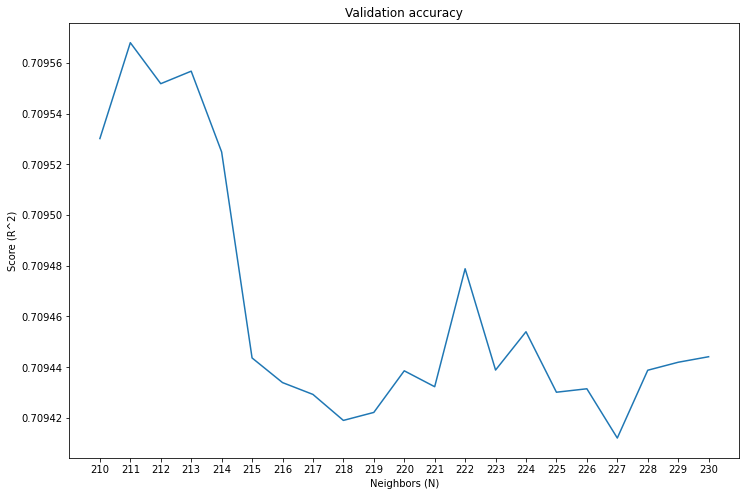

In [ ]:
knn_reg_accuracy(all_df,210,230,train_df, valid_df)

In [ ]:
all_knnR, XknnR_train, yknnR_train, XknnR_valid, yknnR_valid, XknnR_test, yknnR_test = knn_reg_model(all_df,211,train_df, test_df, valid_df)

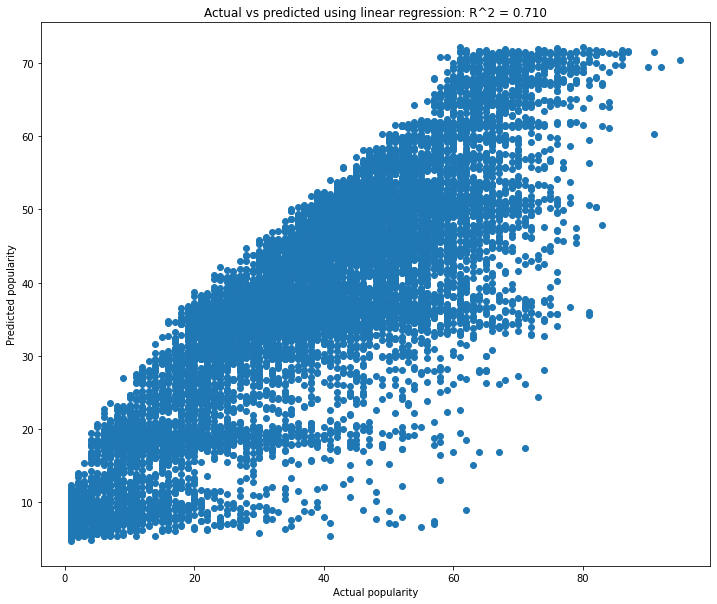

In [ ]:
knn_scatterplot(all_knnR, XknnR_valid, yknnR_valid)

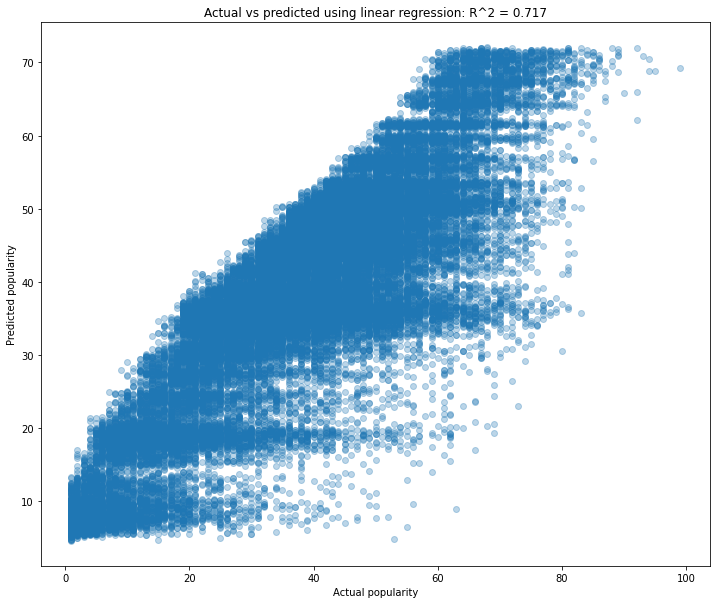

In [ ]:
knn_scatterplot(all_knnR, XknnR_test, yknnR_test, a = .3)

# Checking the error for our KNN Regression

In [ ]:
error_df = yknnR_test.to_frame(name = 'actual')
error_df['predicted'] = all_knnR.predict(XknnR_test)
error_df['error'] = abs(error_df['actual'] - error_df['predicted'])
error = error_df['error'].sum()/error_df.shape[0]

print(f'The average error for each popularity prediction is {error}')


The average error for each popularity prediction is 7.4479758559498235


In [ ]:
error_df['cut_actual'] = pd.qcut(error_df['actual'], q=10, labels=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])
error_df['cut_predicted'] = pd.qcut(error_df['predicted'], q=10, labels=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])

In [ ]:
#checks what percent of 'cut' we predicted correctly
#ex. predicted bottom 10% / actually bottom 10%
def cut_percent_correct(df, cut):
  check_df = df[df['cut_actual'] == cut]
  num_correct = (check_df['cut_actual'] == check_df['cut_predicted']).sum()
  num_actually = check_df.shape[0]
  percent = 100*num_correct/num_actually
  print(f'Out of {num_actually} that were actually {cut}, {num_correct} were predicted {cut} ({percent: .2f}%)')

In [ ]:
#Checks precision
def cut_percent_pred_correct(df, cut):
  for c in cut:
    check_df = df[df['cut_predicted'] == cut]
    num_correct = (check_df['cut_actual'] == check_df['cut_predicted']).sum()
    num_pred = check_df.shape[0]
    percent = 100*num_correct/num_pred
    print(f'Out of {num_pred} we predicted to be {cut}, {num_correct} were actually {cut} ({percent: .2f}%)') 

In [ ]:
#Graphs recall
def cut_percent_correct_graph(df, cut):
  check_df = df[df['cut_actual'] == cut]
  num_correct = (check_df['cut_actual'] == check_df['cut_predicted']).sum()
  num_actually = check_df.shape[0]
  percent = 100*num_correct/num_actually

  figure = plt.figure()
  subplot = figure.add_subplot()

  index = 1
  width = 1

  plt.bar('Predicted', num_correct)
  plt.bar('Actual', num_actually)
  plt.title(f'Recall for {cut}: {percent: .2f}%')

In [ ]:
#Graphs precision
def cut_percent_pred_correct_graph(df, cut):
  check_df = df[df['cut_predicted'] == cut]
  num_correct = (check_df['cut_actual'] == check_df['cut_predicted']).sum()
  num_pred = check_df.shape[0]
  percent = 100*num_correct/num_pred

  figure = plt.figure()
  subplot = figure.add_subplot()

  index = 1
  width = 1

  plt.bar('Predicted', num_pred)
  plt.bar('Actual', num_correct)
  plt.title(f'Precision for {cut}: {percent: .2f}%')

In [ ]:
#Gives us the range for cut for the predicted values
for i in error_df['cut_actual'].unique():
  small = error_df[error_df['cut_predicted'] == i]['predicted'].unique().min()
  big = error_df[error_df['cut_predicted'] == i]['predicted'].unique().max()
  print(f'{i}: {small,big}')

9: (50.36492890995261, 55.74881516587678)
10: (55.75355450236967, 72.12796208530806)
7: (41.84834123222749, 46.09004739336493)
3: (23.75829383886256, 33.426540284360186)
1: (4.521327014218009, 16.0)
6: (37.26066350710901, 41.843601895734594)
8: (46.09478672985782, 50.360189573459714)
4: (33.43127962085308, 35.60189573459716)
2: (16.00473933649289, 23.748815165876778)
5: (35.60663507109005, 37.25592417061611)


In [ ]:
for c in error_df['cut_actual'].unique():
  cut_percent_correct(error_df, c)

Out of 4328 that were actually 9, 1110 were predicted 9 ( 25.65%)
Out of 4040 that were actually 10, 2403 were predicted 10 ( 59.48%)
Out of 4242 that were actually 7, 691 were predicted 7 ( 16.29%)
Out of 4313 that were actually 3, 1016 were predicted 3 ( 23.56%)
Out of 4264 that were actually 1, 3078 were predicted 1 ( 72.19%)
Out of 4627 that were actually 6, 649 were predicted 6 ( 14.03%)
Out of 3734 that were actually 8, 782 were predicted 8 ( 20.94%)
Out of 4042 that were actually 4, 851 were predicted 4 ( 21.05%)
Out of 4739 that were actually 2, 1846 were predicted 2 ( 38.95%)
Out of 4237 that were actually 5, 707 were predicted 5 ( 16.69%)


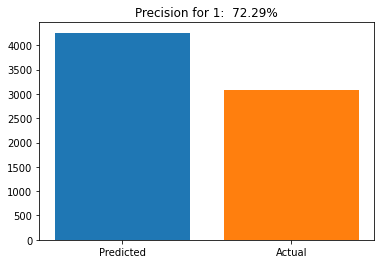

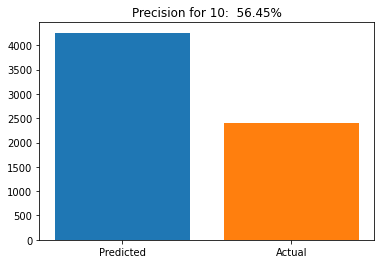

In [ ]:
for c in ['1','10']:
  cut_percent_pred_correct_graph(error_df, c)

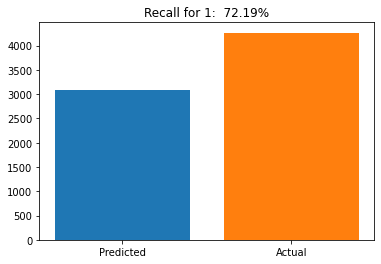

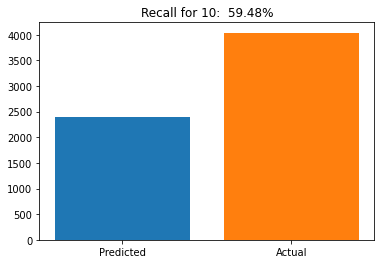

In [ ]:
for c in ['1','10']:
  cut_percent_correct_graph(error_df, c)

In [ ]:
for c in error_df['cut_actual'].unique():
  cut_percent_pred_correct(error_df, c)

Out of 4248 we predicted to be 9, 1110 were actually 9 ( 26.13%)
Out of 4257 we predicted to be 10, 2403 were actually 10 ( 56.45%)
Out of 4256 we predicted to be 7, 691 were actually 7 ( 16.24%)
Out of 4254 we predicted to be 3, 1016 were actually 3 ( 23.88%)
Out of 4258 we predicted to be 1, 3078 were actually 1 ( 72.29%)
Out of 4254 we predicted to be 6, 649 were actually 6 ( 15.26%)
Out of 4264 we predicted to be 8, 782 were actually 8 ( 18.34%)
Out of 4264 we predicted to be 4, 851 were actually 4 ( 19.96%)
Out of 4258 we predicted to be 2, 1846 were actually 2 ( 43.35%)
Out of 4253 we predicted to be 5, 707 were actually 5 ( 16.62%)


#Scaling all data. (dividing each row by the year's mean/median) and creating models


In [ ]:
col = ['acousticness', 'danceability', 'duration_ms', 'energy', 'explicit',
      'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'popularity',
      'speechiness', 'tempo', 'valence']
def scale_data(df, cols):

  for y in df['year'].unique():
      for att in cols:
        att_by_year = df[df['year'] == y][att]
        if att_by_year.mean() != 0:
          df.loc[df['year'] == y, att] = att_by_year / att_by_year.mean()
    
  return df

In [ ]:
normalize_lr, X_normalize_train, y_normalize_train, X_normalize_valid, y_normalize_valid, X_normalize_test, y_normalize_test = lr_fit(normalize_df)

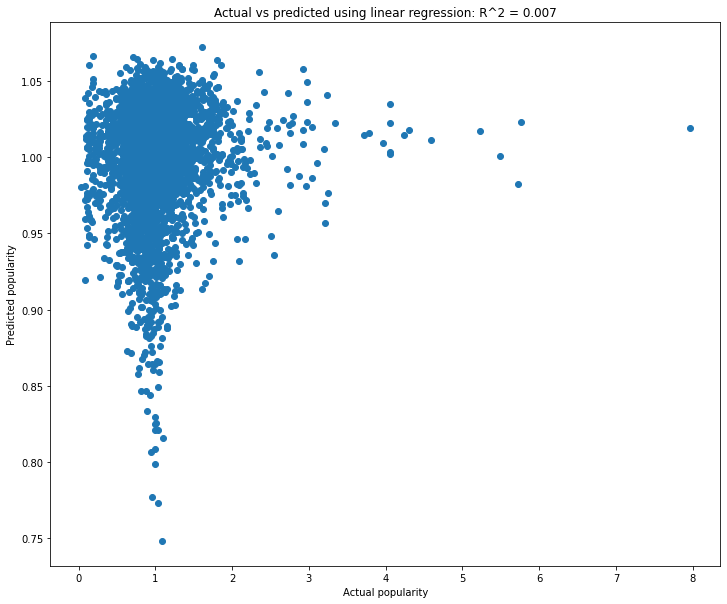

In [ ]:
lr_scatterplot(normalize_lr, X_normalize_valid, y_normalize_valid)

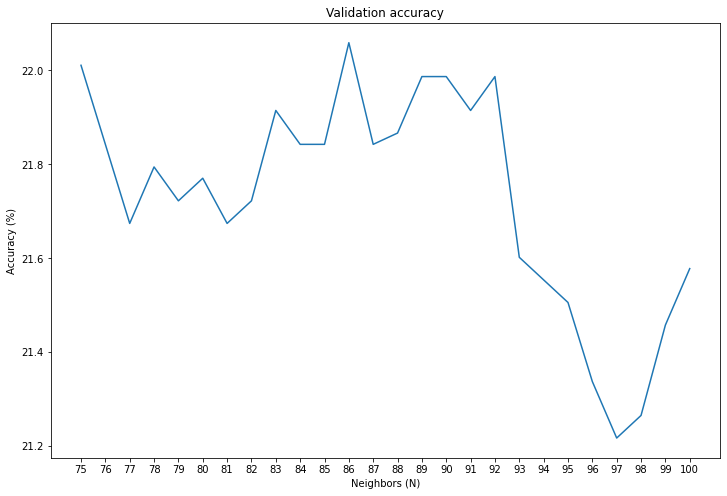

In [ ]:
knn_accuracy(normalize_df,75, 100)

In [ ]:
normalize_knn, X_normalize_train, y_normalize_train, X_normalize_valid, y_normalize_valid, X_normalze_test, y_normalize_test = knn_model(normalize_df, 86)

In [ ]:
check_actual(normalize_knn, X_normalize_valid, y_normalize_valid, '10')

0.22727272727272727

In [ ]:
check_actual(normalize_knn, X_normalize_valid, y_normalize_valid, '1')

0.6605504587155964

- Predicted 22.72% of actual 10s correctly
- Predicted 66.05% of actual 1s correctly
- (10 is top 10% of popular songs, 1 is bottom 10% of popular songs)



In [ ]:
check_pred(normalize_knn, X_normalize_valid, y_normalize_valid, '10')

0.22277227722772278

In [ ]:
check_pred(normalize_knn, X_normalize_valid, y_normalize_valid, '1')

0.37994722955145116

- Out of all the predicted 10s, 22.27% were actually 10s
- Out of all the predicted 1s, 37.99% were actually 1s

#Using KNN Regressor
  - This was our best model
  - In this section, we will be looking for artists who are not popular according to the data, but is by our model

In [ ]:
all_df = pd.read_csv(drive_dir + 'data/data.csv')

In [ ]:
feat = {"danceability": 0.6662499999999998, 'instrumentalness': 0.022029588031914897, 'liveness': 0.19728829787234037, 'loudness': -6.84123404255319 , 'speechiness':  0.1401207446808511}

In [ ]:
def next_song(df):

  next_song_df = df[(all_df['year'] == 2019) | (df['year'] == 2020)]
  next_song_df = next_song_df[next_song_df['popularity'] < 25]

  for f,value in feat.items():
    next_song_df[f'closeness to {f}'] = abs(next_song_df[f] - value)

  next_song_df['overall closeness'] = next_song_df['closeness to danceability'] + next_song_df['closeness to instrumentalness'] + next_song_df['closeness to liveness'] +next_song_df['closeness to loudness'] + next_song_df['closeness to speechiness']

  return next_song_df['overall closeness'].nsmallest(10)

In [ ]:
def next_artist(df):
  next_artist_df = by_artist_df[by_artist_df['popularity'] < 10]

  for f,value in feat.items():
    next_artist_df[f'closeness to {f}'] = abs(next_artist_df[f] - value)
  
  next_artist_df['overall closeness'] = next_artist_df['closeness to danceability'] + next_artist_df['closeness to instrumentalness'] + next_artist_df['closeness to liveness'] +next_artist_df['closeness to loudness'] + next_artist_df['closeness to speechiness']

  return next_artist_df['overall closeness'].nsmallest(10)

In [ ]:
next_song(all_df)

24193     0.206278
78012     0.229023
16215     0.239803
70609     0.286246
169825    0.302934
135520    0.388810
70584     0.406646
70585     0.406646
152878    0.418823
48007     0.559412
Name: overall closeness, dtype: float64

In [ ]:
all_df.loc[152878]

acousticness                                         0.634
artists             ['Machine Gun Kelly', 'Travis Barker']
danceability                                         0.658
duration_ms                                         195857
energy                                               0.425
explicit                                                 1
id                                  4Uah1pyFsLEsw4eauJvuNF
instrumentalness                                         0
key                                                      7
liveness                                             0.129
loudness                                            -6.621
mode                                                     0
name                           Bloody Valentine - Acoustic
popularity                                              21
release_date                                    2020-06-05
speechiness                                         0.0401
tempo                                              140.0

In [ ]:
#['danceability', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'year']
all_knnR.predict([[.658,0,.129,-6.621,.0401,2020]])

array([70.50236967])

In [ ]:
next_artist(by_artist_df)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


14992    0.182151
19811    0.193281
8204     0.206255
21886    0.229023
25411    0.229023
26801    0.229023
21460    0.239803
17716    0.261104
18149    0.263566
1808     0.300746
Name: overall closeness, dtype: float64

In [ ]:
by_artist_df.loc[25411]

artists             Trapical
acousticness           0.384
danceability           0.732
duration_ms           200625
energy                 0.737
instrumentalness           0
liveness                0.14
loudness              -6.832
speechiness           0.0654
tempo                128.042
valence                0.647
popularity                 2
key                        7
mode                       1
count                      2
Name: 25411, dtype: object

In [ ]:
#['danceability', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'year']
all_knnR.predict([[.732,0,.14,-6.832,.0654,2020]])

array([70.63888889])

In [ ]:
#Returns the popular mean and not popular mean for the attribute for a given year
def return_mean_year(df,att, year):
  y_df = year_df(df,year)
  y_df['cut'] = pd.qcut(y_df['popularity'], q=10, labels=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])
  pop_mean = y_df[y_df['cut'] == '10'][att].mean()
  not_pop_mean = y_df[y_df['cut'] == '1'][att].mean()
  return (att,not_pop_mean,pop_mean)

In [ ]:
#Returns popularity for an artist
def artist_pop(name):
  artist_df = by_artist_df[by_artist_df['artists'] == name]
  artist_df
  artist_df = artist_df[['danceability', 'instrumentalness', 'liveness', 'loudness', 'speechiness']]
  artist_df['year'] = 2020
  return all_knnR.predict(artist_df)

In [ ]:
all_df[all_df['name'] == 'Trumpets']

acousticness           artists  danceability  ...   tempo  valence  year
87277         0.555  ['Jason Derulo']         0.635  ...  82.142    0.638  2013

[1 rows x 19 columns]

In [ ]:
all_knnR.predict([[.635,0,.097,-4.862,.258,2013]])

array([55.81990521])

In [ ]:
#features = ['danceability', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'year']

In [ ]:
knn_att = ['danceability', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'popularity']
for att in knn_att:
  print(return_mean_year(all_df,att, 2020))

('danceability', 0.6662499999999998, 0.7284166666666668)
('instrumentalness', 0.022029588031914897, 0.004660807976190476)
('liveness', 0.19728829787234037, 0.1858107142857143)
('loudness', -6.84123404255319, -5.662529761904759)
('speechiness', 0.1401207446808511, 0.11775416666666659)
('popularity', 29.5, 84.77380952380952)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See